# Máster en Data Science - Machine Learning

# Tratamiento de Valores missing, outlier y correlaciones
Autor: Ramón Morillo Barrera

## Dataset: Application data

En este notebook trabajaremos en el análisis exploratorio gráfico con el objetivo de visualizar y entender el comportamiento de las variables. Trabajaremos en el tratamiento de valores nulos o missing, outliers y estudiaremos la correlacion entre variables.

Como comentamos anteriormente, se llevará a cabo una separación estratificada en el paso de train-test split debido al desbalanceo de la variable objetivo.

#### Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from termcolor import colored, cprint
import scipy.stats as ss
import warnings
import sys
from scipy.stats import chi2_contingency

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

#### Funciones

In [2]:
sys.path.append('../src')
import funciones_auxiliares as f_aux
sys.path.remove('../src')

# Constante
seed = 12354

#### Importo el dataset

In [3]:
df_loan = pd.read_csv('../../data_loan_status/data_preprocessing/pd_data_initial_preprocessing.csv')
df_loan.head()

SK_ID_CURR  COMMONAREA_AVG  COMMONAREA_MEDI  COMMONAREA_MODE  \
0      100002          0.0143           0.0144           0.0144   
1      100003          0.0605           0.0608           0.0497   
2      100004             NaN              NaN              NaN   
3      100006             NaN              NaN              NaN   
4      100007             NaN              NaN              NaN   

   NONLIVINGAPARTMENTS_AVG  NONLIVINGAPARTMENTS_MEDI  \
0                   0.0000                    0.0000   
1                   0.0039                    0.0039   
2                      NaN                       NaN   
3                      NaN                       NaN   
4                      NaN                       NaN   

   NONLIVINGAPARTMENTS_MODE FONDKAPREMONT_MODE  LIVINGAPARTMENTS_MEDI  \
0                       0.0   reg oper account                 0.0205   
1                       0.0   reg oper account                 0.0787   
2                       NaN                NaN                    NaN   
3                       NaN                NaN                    NaN   
4                       NaN                NaN                    NaN   

   LIVINGAPARTMENTS_AVG  LIVINGAPARTMENTS_MODE  FLOORSMIN_MODE  FLOORSMIN_AVG  \
0                0.0202                  0.022          0.1250         0.1250   
1                0.0773                  0.079          0.3333         0.3333   
2                   NaN                    NaN             NaN            NaN   
3                   NaN                    NaN             NaN            NaN   
4                   NaN                    NaN             NaN            NaN   

   FLOORSMIN_MEDI  YEARS_BUILD_MODE  YEARS_BUILD_MEDI  YEARS_BUILD_AVG  \
0          0.1250            0.6341            0.6243           0.6192   
1          0.3333            0.8040            0.7987           0.7960   
2             NaN               NaN               NaN              NaN   
3             NaN               NaN               NaN              NaN   
4             NaN               NaN               NaN              NaN   

   OWN_CAR_AGE  LANDAREA_MEDI  LANDAREA_AVG  LANDAREA_MODE  BASEMENTAREA_MODE  \
0          NaN         0.0375        0.0369         0.0377             0.0383   
1          NaN         0.0132        0.0130         0.0128             0.0538   
2         26.0            NaN           NaN            NaN                NaN   
3          NaN            NaN           NaN            NaN                NaN   
4          NaN            NaN           NaN            NaN                NaN   

   BASEMENTAREA_AVG  BASEMENTAREA_MEDI  EXT_SOURCE_1  NONLIVINGAREA_AVG  \
0            0.0369             0.0369      0.083037             0.0000   
1            0.0529             0.0529      0.311267             0.0098   
2               NaN                NaN           NaN                NaN   
3               NaN                NaN           NaN                NaN   
4               NaN                NaN           NaN                NaN   

   NONLIVINGAREA_MODE  NONLIVINGAREA_MEDI  ELEVATORS_MEDI  ELEVATORS_AVG  \
0                 0.0                0.00            0.00           0.00   
1                 0.0                0.01            0.08           0.08   
2                 NaN                 NaN             NaN            NaN   
3                 NaN                 NaN             NaN            NaN   
4                 NaN                 NaN             NaN            NaN   

   ELEVATORS_MODE WALLSMATERIAL_MODE  APARTMENTS_AVG  APARTMENTS_MODE  \
0          0.0000       Stone, brick          0.0247           0.0252   
1          0.0806              Block          0.0959           0.0924   
2             NaN                NaN             NaN              NaN   
3             NaN                NaN             NaN              NaN   
4             NaN                NaN             NaN              NaN   

   APARTMENTS_MEDI  ENTRANCES_MEDI  ENTRANCES_MODE  ENTRAN

In [4]:
df_loan.columns

Index(['SK_ID_CURR', 'COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAPARTMENTS_MODE', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG',
       ...
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object', length=122)

### Cambio de tipo de variables categóricas

Cambio el tipo de las variables object a category

In [5]:
list_var_cat, other = f_aux.dame_variables_categoricas(dataset=df_loan)
df_loan[list_var_cat] = df_loan[list_var_cat].astype("category")
list_var_continuous = list(df_loan.select_dtypes('float').columns)
df_loan[list_var_continuous] = df_loan[list_var_continuous].astype(float)
df_loan.dtypes

SK_ID_CURR                         int64
COMMONAREA_AVG                   float64
COMMONAREA_MEDI                  float64
COMMONAREA_MODE                  float64
NONLIVINGAPARTMENTS_AVG          float64
NONLIVINGAPARTMENTS_MEDI         float64
NONLIVINGAPARTMENTS_MODE         float64
FONDKAPREMONT_MODE              category
LIVINGAPARTMENTS_MEDI            float64
LIVINGAPARTMENTS_AVG             float64
LIVINGAPARTMENTS_MODE            float64
FLOORSMIN_MODE                   float64
FLOORSMIN_AVG                    float64
FLOORSMIN_MEDI                   float64
YEARS_BUILD_MODE                 float64
YEARS_BUILD_MEDI                 float64
YEARS_BUILD_AVG                  float64
OWN_CAR_AGE                      float64
LANDAREA_MEDI                    float64
LANDAREA_AVG                     float64
LANDAREA_MODE                    float64
BASEMENTAREA_MODE                float64
BASEMENTAREA_AVG                 float64
BASEMENTAREA_MEDI                float64
EXT_SOURCE_1    

### Separación Train-Test estratificada

Separaré el dataset en train y test manteniendo la proporción de la variable objetivo. Pero antes, voy a graficar la proporción de dicha variable.

In [6]:
target_count = df_loan.groupby('TARGET').agg({'TARGET':'count'}).reset_index(drop=True)
target_count['value'] = list(target_count.index)
target_count

TARGET  value
0  282686      0
1   24825      1

In [7]:
df_plot_loan_status = df_loan['TARGET']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

df_plot_loan_status_conteo = df_loan['TARGET'].value_counts(normalize=True).reset_index()
df_plot_loan_status_conteo

TARGET  proportion
0       0    0.919271
1       1    0.080729

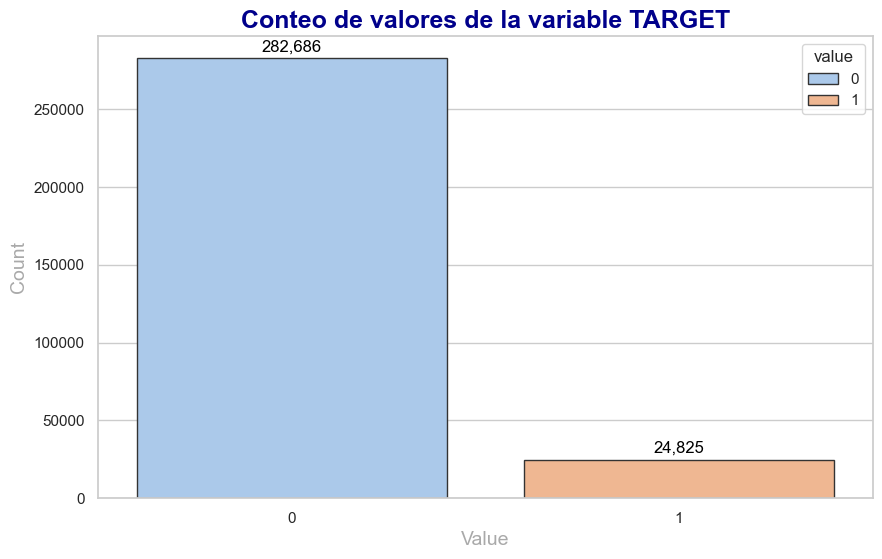

In [8]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))  # Aumenta el tamaño de la gráfica

# Grafico de barras
sns.barplot(
    data=target_count, 
    x='value', 
    y='TARGET', 
    ax=ax, 
    hue='value', 
    dodge=False,  # Evita separación entre barras
    palette="pastel",  
    edgecolor="0.2"    # Añade bordes a las barras
)

# Título y etiquetas de ejes 
ax.set_title('Conteo de valores de la variable TARGET', fontsize=18, fontweight='bold', color='darkblue')
ax.set_ylabel('Count', fontsize=14, color='darkgrey')
ax.set_xlabel('Value', fontsize=14, color='darkgrey')

# Añade las etiquetas de conteo encima de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}', label_type="edge", padding=3, fontsize=12, color="black")

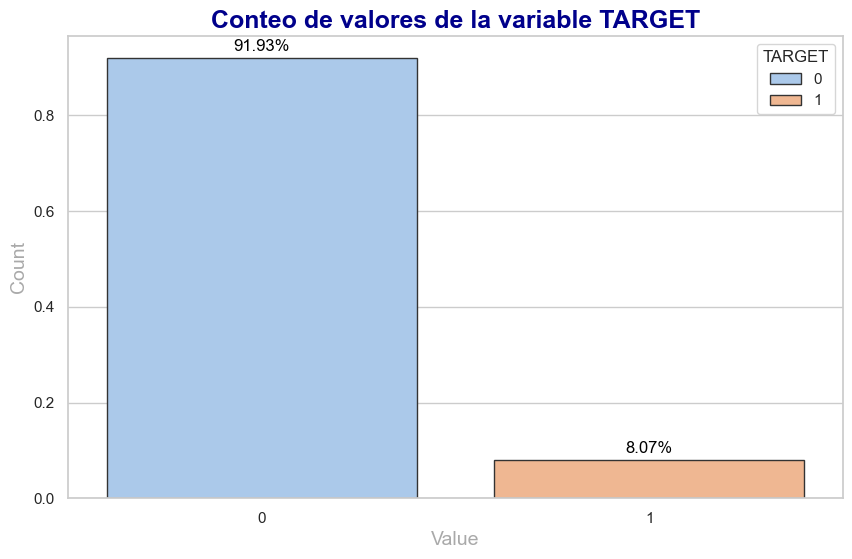

In [9]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))  # Aumenta el tamaño de la gráfica

# Grafico de barras
sns.barplot(
    data=df_plot_loan_status_conteo, 
    x='TARGET', 
    y='proportion', 
    ax=ax, 
    hue='TARGET', 
    dodge=False,  # Evita separación entre barras
    palette="pastel",  
    edgecolor="0.2"    # Añade bordes a las barras
)

# Título y etiquetas de ejes 
ax.set_title('Conteo de valores de la variable TARGET', fontsize=18, fontweight='bold', color='darkblue')
ax.set_ylabel('Count', fontsize=14, color='darkgrey')
ax.set_xlabel('Value', fontsize=14, color='darkgrey')

# Añade las etiquetas de conteo encima de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.2%}', label_type="edge", padding=3, fontsize=12, color="black")

Calculé y grafiqué los valores de la variable Target para combrobar que al realizar la separación en train y test las proporciones se mantengan gracias a la estratificación.

In [10]:
from sklearn.model_selection import train_test_split
X_df_loan, X_df_loan_test, y_df_loan, y_df_loan_test = train_test_split(df_loan.drop('TARGET',axis=1), 
                                                                     df_loan['TARGET'], 
                                                                     stratify=df_loan['TARGET'], 
                                                                     test_size=0.2)
df_loan_train = pd.concat([X_df_loan, y_df_loan],axis=1)
df_loan_test = pd.concat([X_df_loan_test, y_df_loan_test],axis=1)

In [11]:
print(f'''
\033[1mTRAIN\033[0m:
{y_df_loan.value_counts(normalize=True)}

\033[1mTEST\033[0m:
{y_df_loan_test.value_counts(normalize=True)}''')


TRAIN:
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

TEST:
TARGET
0    0.919272
1    0.080728
Name: proportion, dtype: float64


La separación estratificada se realizó correctamente. Observamos la misma proporción de la variable TARGET tanto en train como en test.

### Visualización descriptiva de los datos

Vamos a observar la proporción de valores nulos en columnas y filas, además de una visualización descriptiva de la relación de las demás variables con la variable TARGET

In [12]:
pd_series_null_columns = df_loan_train.isnull().sum().sort_values(ascending=False)
pd_series_null_rows = df_loan_train.isnull().sum(axis=1).sort_values(ascending=False)
print(pd_series_null_columns.shape, pd_series_null_rows.shape)

pd_null_columnas = pd.DataFrame(pd_series_null_columns, columns=['nulos_columnas'])     
pd_null_filas = pd.DataFrame(pd_series_null_rows, columns=['nulos_filas'])  
pd_null_filas['TARGET'] = df_loan['TARGET'].copy()
pd_null_columnas['porcentaje_columnas'] = pd_null_columnas['nulos_columnas']/df_loan_train.shape[0]
pd_null_filas['porcentaje_filas']= pd_null_filas['nulos_filas']/df_loan_train.shape[1]

(122,) (246008,)


In [13]:
pd_null_columnas

nulos_columnas  porcentaje_columnas
COMMONAREA_AVG                        172095             0.699550
COMMONAREA_MEDI                       172095             0.699550
COMMONAREA_MODE                       172095             0.699550
NONLIVINGAPARTMENTS_MODE              170922             0.694782
NONLIVINGAPARTMENTS_AVG               170922             0.694782
NONLIVINGAPARTMENTS_MEDI              170922             0.694782
FONDKAPREMONT_MODE                    168421             0.684616
LIVINGAPARTMENTS_MEDI                 168287             0.684071
LIVINGAPARTMENTS_AVG                  168287             0.684071
LIVINGAPARTMENTS_MODE                 168287             0.684071
FLOORSMIN_AVG                         167070             0.679124
FLOORSMIN_MODE                        167070             0.679124
FLOORSMIN_MEDI                        167070             0.679124
YEARS_BUILD_MODE                      163733             0.665560
YEARS_BUILD_AVG                       163733             0.665560
YEARS_BUILD_MEDI                      163733             0.665560
OWN_CAR_AGE                           162475             0.660446
LANDAREA_MEDI                         146273             0.594586
LANDAREA_MODE                         146273             0.594586
LANDAREA_AVG                          146273             0.594586
BASEMENTAREA_AVG                      144206             0.586184
BASEMENTAREA_MODE                     144206             0.586184
BASEMENTAREA_MEDI                     144206             0.586184
EXT_SOURCE_1                          138709             0.563839
NONLIVINGAREA_AVG                     136075             0.553132
NONLIVINGAREA_MODE                    136075             0.553132
NONLIVINGAREA_MEDI                    136075             0.553132
ELEVATORS_MODE                        131360             0.533966
ELEVATORS_MEDI                        131360             0.533966
ELEVATORS_AVG                         131360             0.533966
WALLSMATERIAL_MODE                    125368             0.509609
APARTMENTS_MEDI                       125154             0.508740
APARTMENTS_AVG                        125154             0.508740
APARTMENTS_MODE                       125154             0.508740
ENTRANCES_MODE                        124187             0.504809
ENTRANCES_MEDI                        124187             0.504809
ENTRANCES_AVG                         124187             0.504809
LIVINGAREA_AVG                        123835             0.503378
LIVINGAREA_MEDI                       123835             0.503378
LIVINGAREA_MODE                       123835             0.503378
HOUSETYPE_MODE                        123708             0.502862
FLOORSMAX_MODE                        122718             0.498837
FLOORSMAX_MEDI                        122718             0.498837
FLOORSMAX_AVG                         122718             0.498837
YEARS_BEGINEXPLUATATION_AVG           120316             0.489074
YEARS_BEGINEXPLUATATION_MODE          120316             0.489074
YEARS_BEGINEXPLUATATION_MEDI          120316             0.489074
TOTALAREA_MODE                        119033             0.483858
EMERGENCYSTATE_MODE                   116924             0.475285
OCCUPATION_TYPE                        77135             0.313547
EXT_SOURCE_3                           48623             0.197648
AMT_REQ_CREDIT_BUREAU_HOUR             33089             0.134504
AMT_REQ_CREDIT_BUREAU_WEEK             33089             0.134504
AMT_REQ_CREDIT_BUREAU_MON              33089             0.134504
AMT_REQ_CREDIT_BUREAU_YEAR             33089             0.134504
AMT_REQ_CREDIT_BUREAU_DAY              33089             0.134504
AMT_REQ_CREDIT_BUREAU_QRT              33089             0.134504
NAME_TYPE_SUITE                         1016             0.004130
DEF_30_CNT_SOCIAL_CIRCLE                 809             0.003289
OBS_60_CNT_SOCIAL_CIRCLE                 809             0.003289
DEF_

In [14]:
pd_null_filas

nulos_filas  TARGET  porcentaje_filas
116937           61       0               0.5
244833           61       0               0.5
69707            61       0               0.5
150206           61       0               0.5
269786           61       0               0.5
...             ...     ...               ...
125844            0       0               0.0
149804            0       0               0.0
148719            0       0               0.0
298651            0       0               0.0
81050             0       0               0.0

[246008 rows x 3 columns]

Vamos a visualizar la distribución de las variables numéricas y categóricas con la variable TARGET

Genero listas por tipos de variables para visualizarlas a continuación.

In [15]:
df_loan_bool, df_loan_cat, df_loan_num = f_aux.tipos_vars1(df_loan,False)

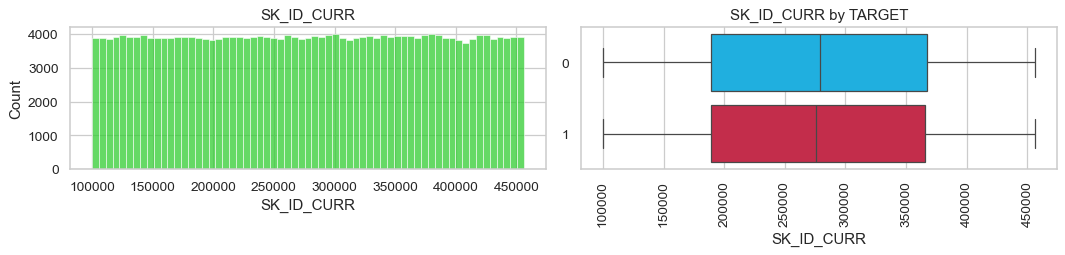

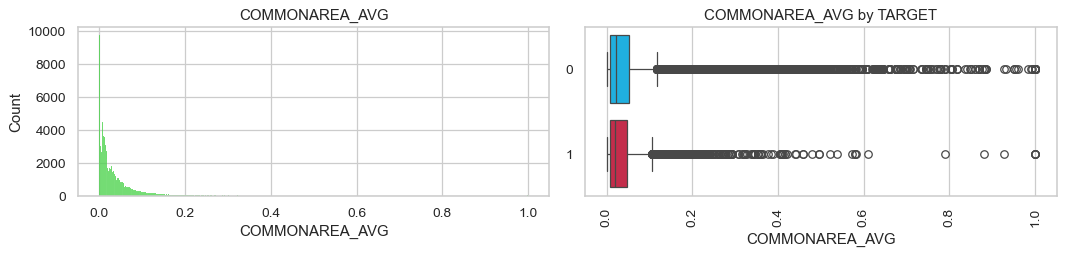

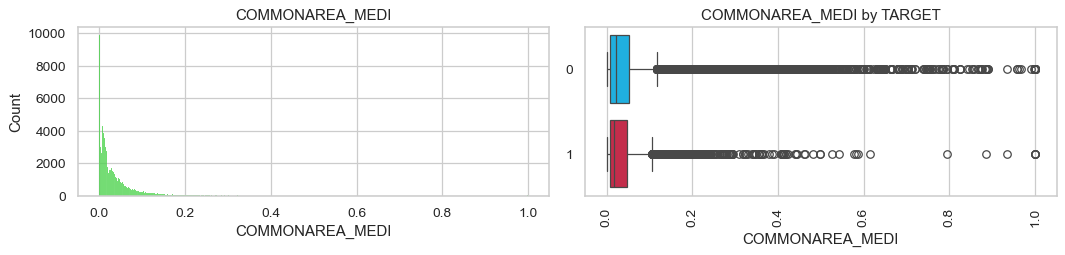

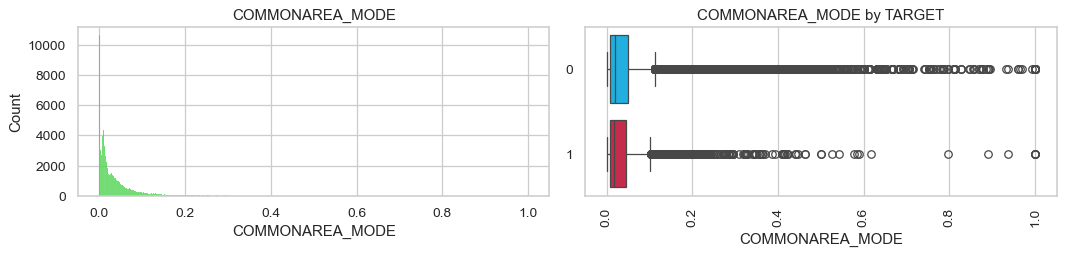

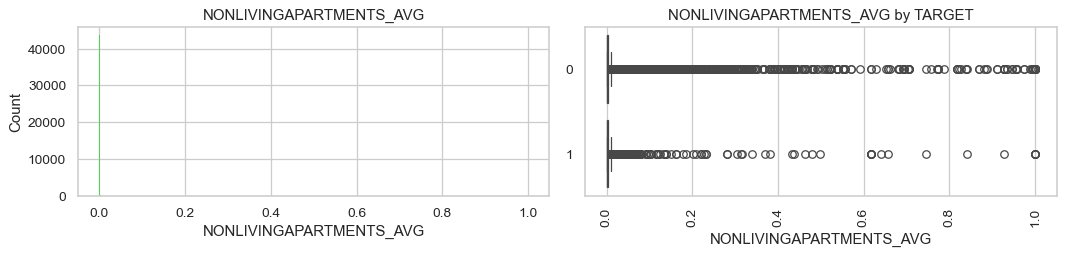

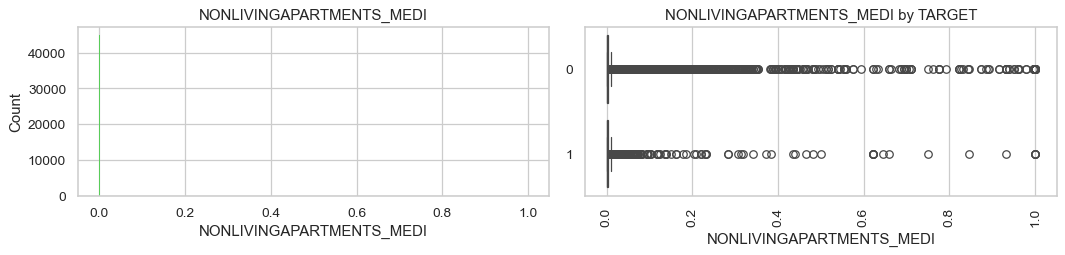

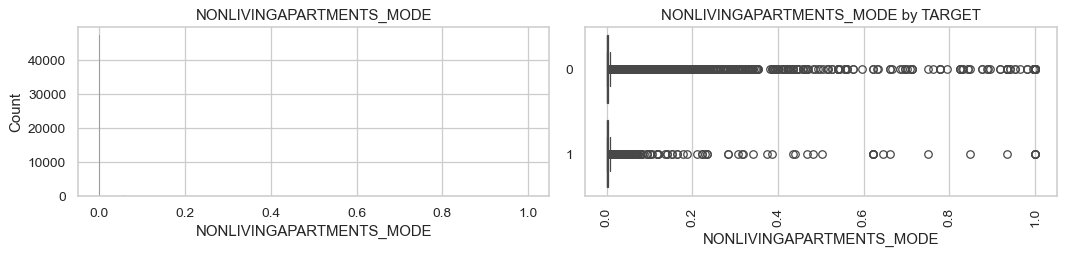

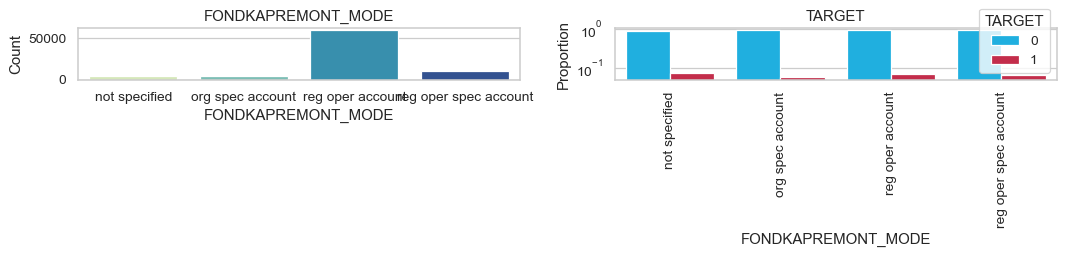

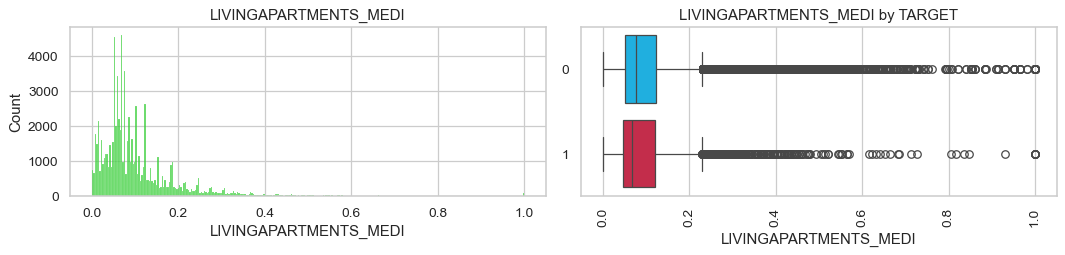

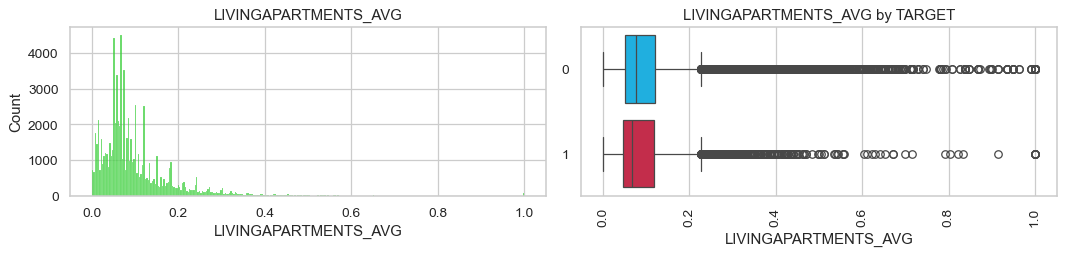

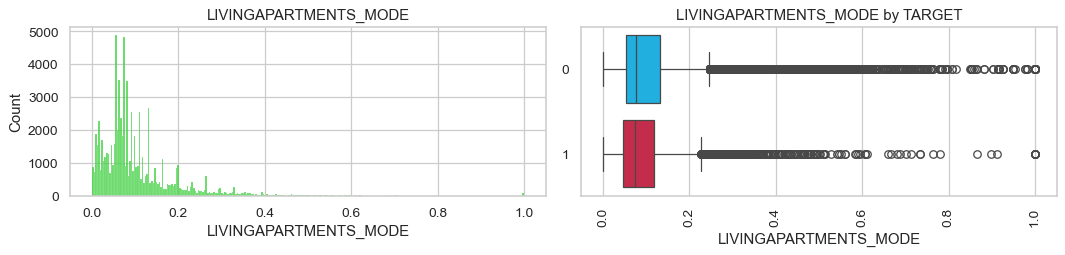

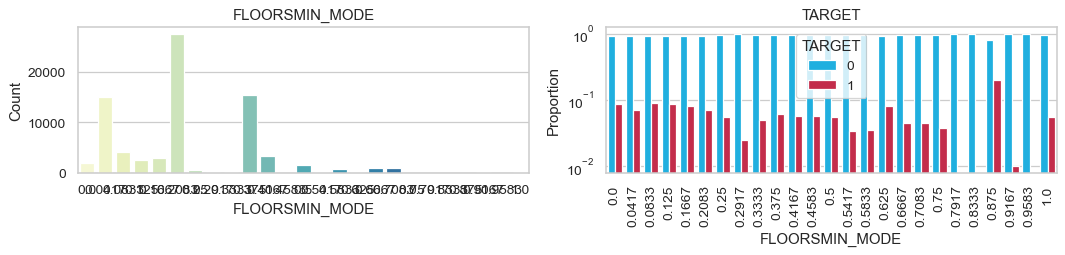

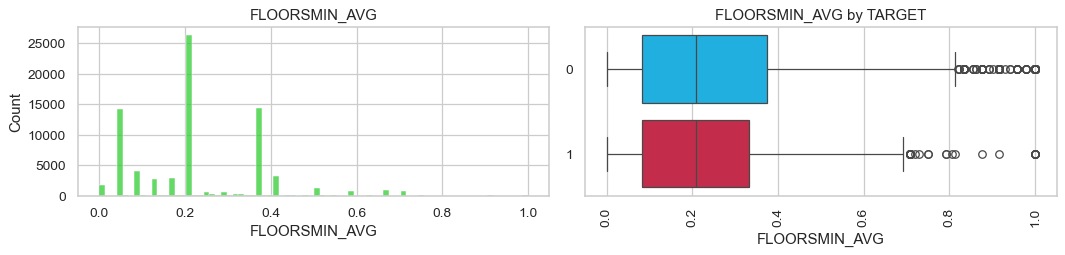

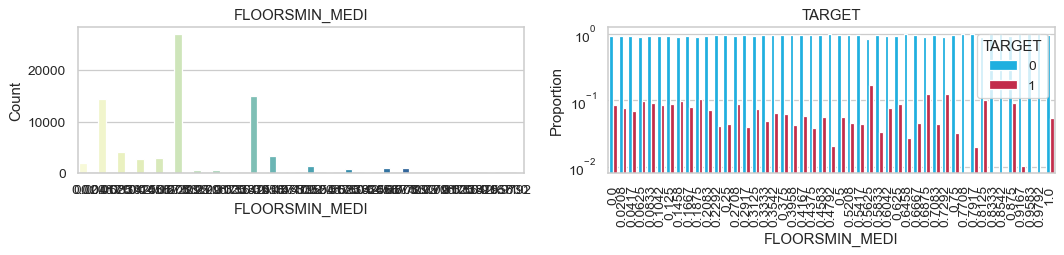

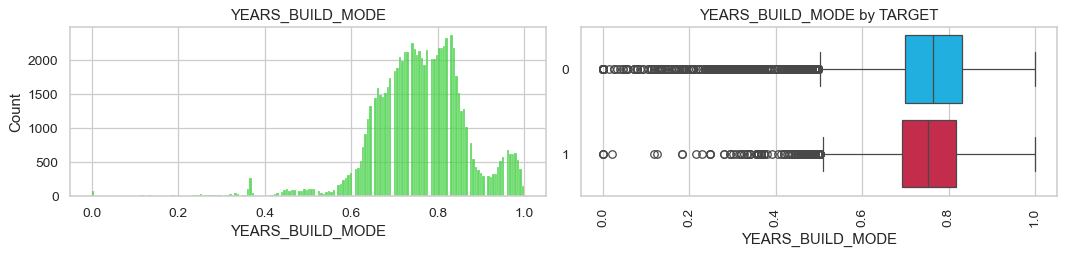

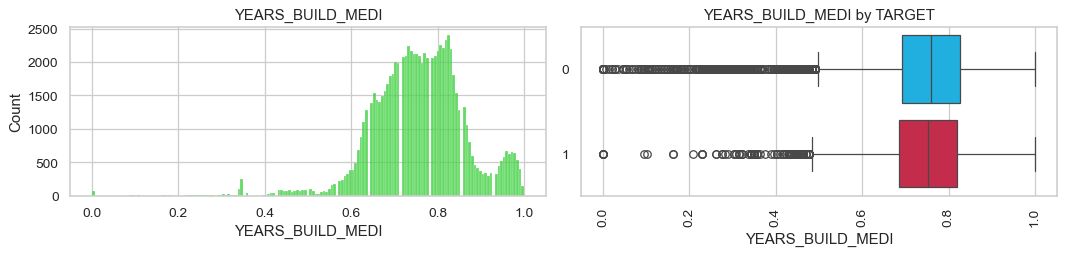

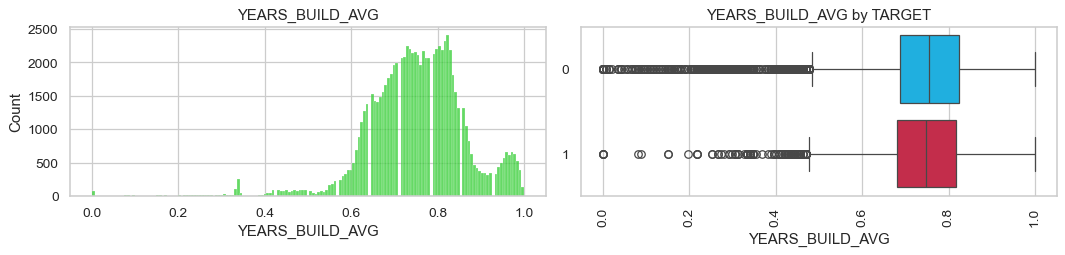

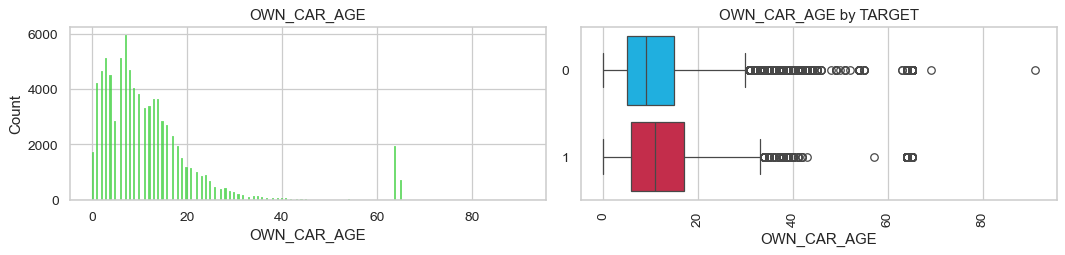

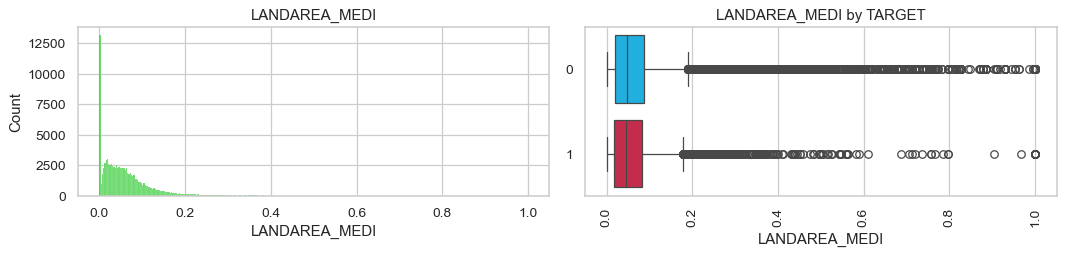

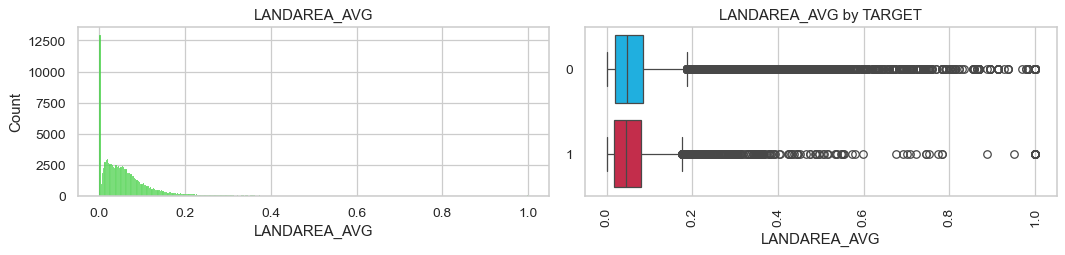

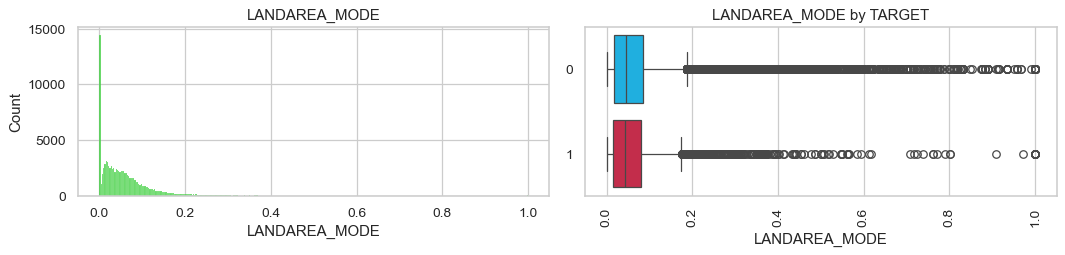

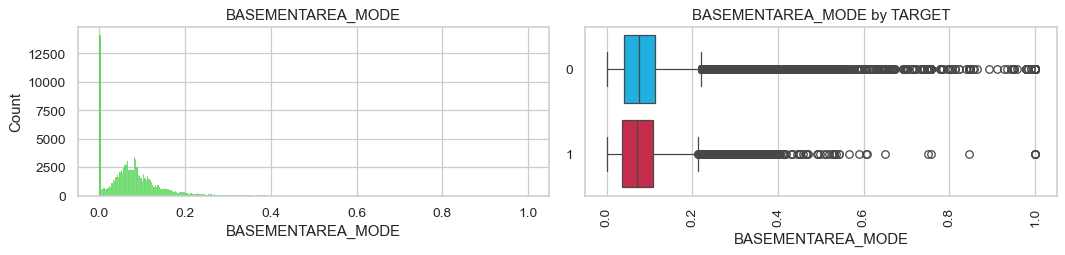

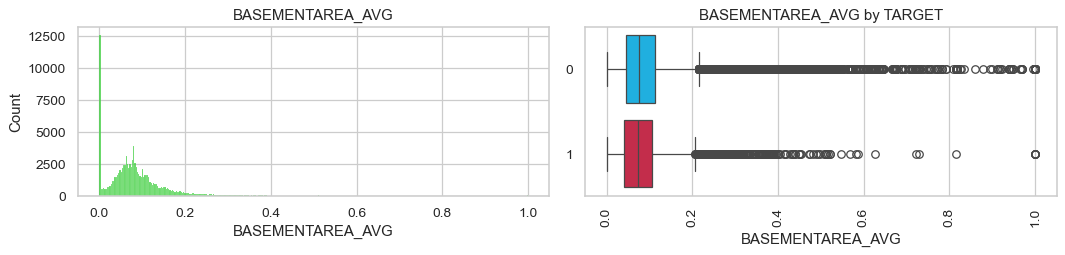

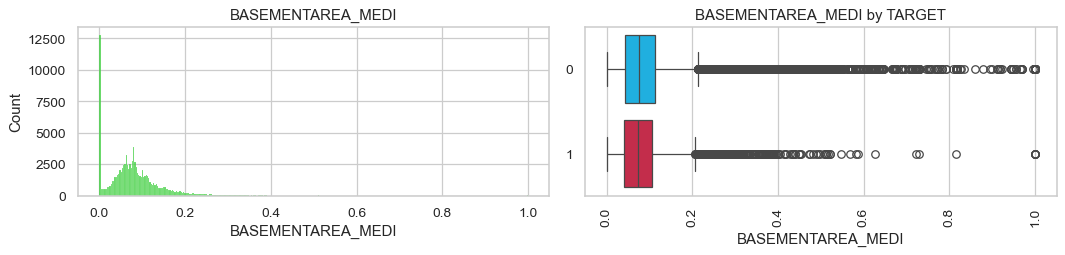

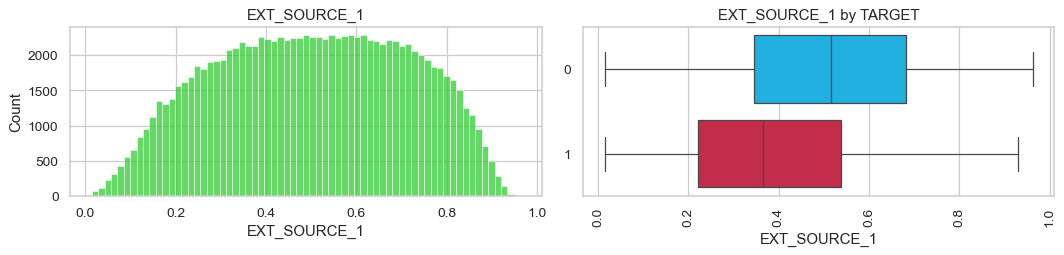

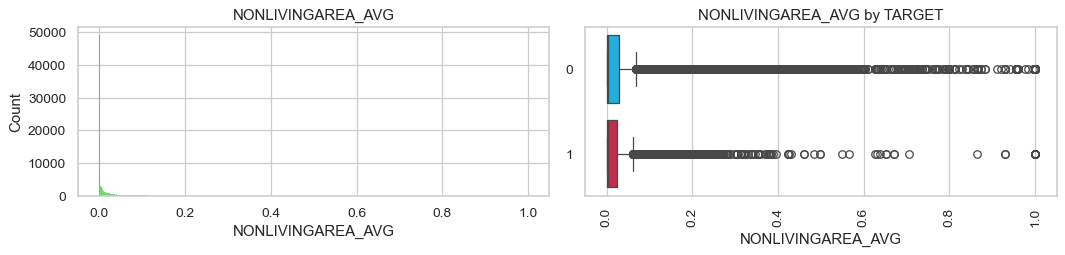

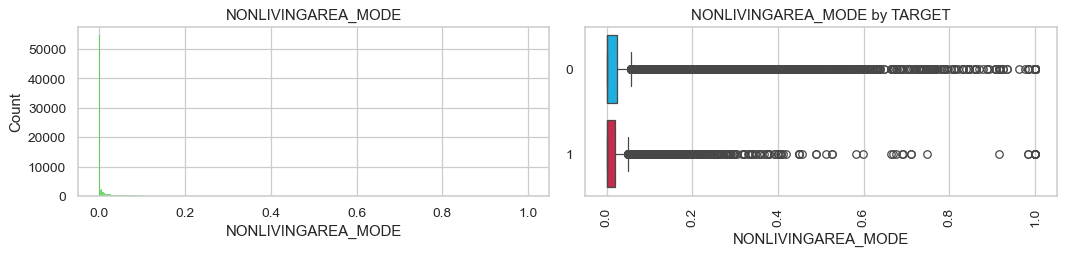

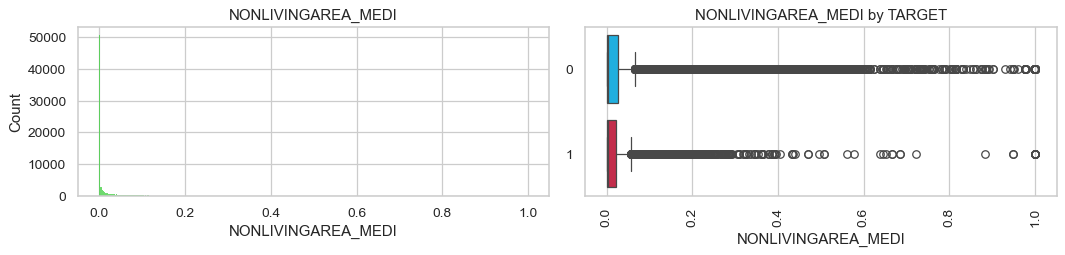

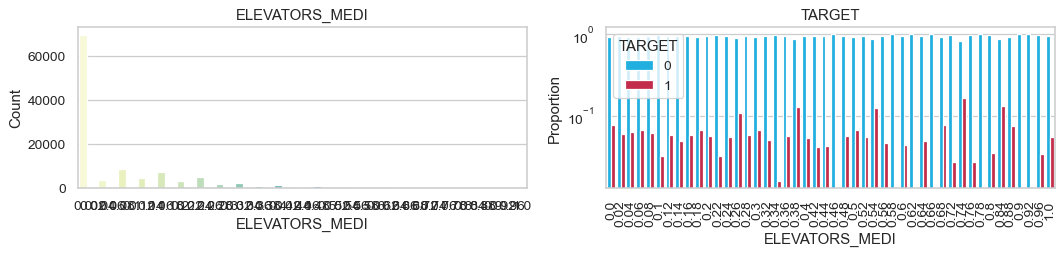

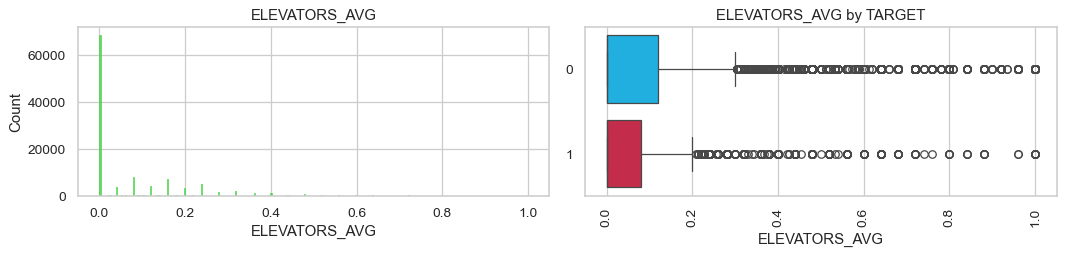

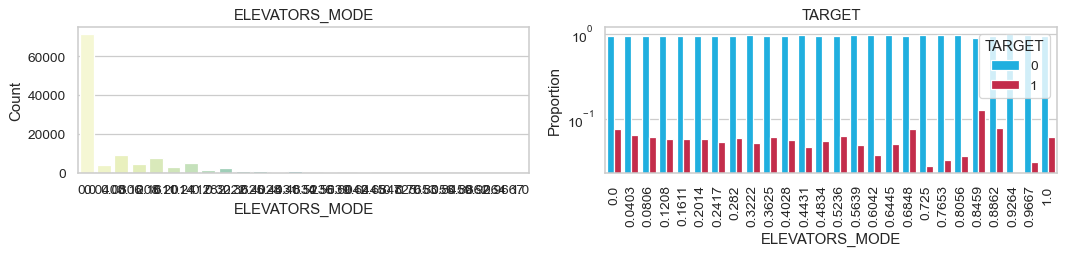

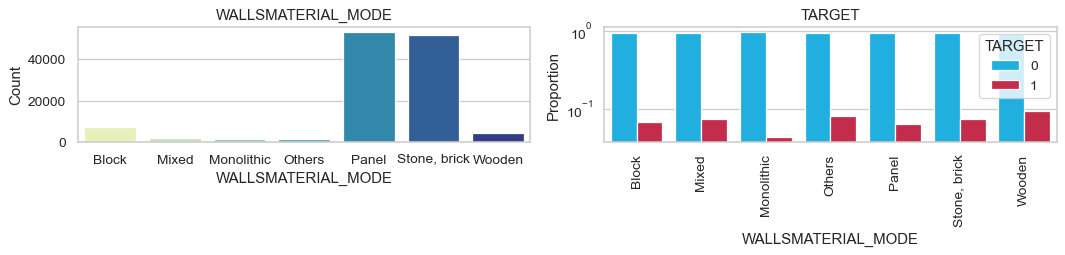

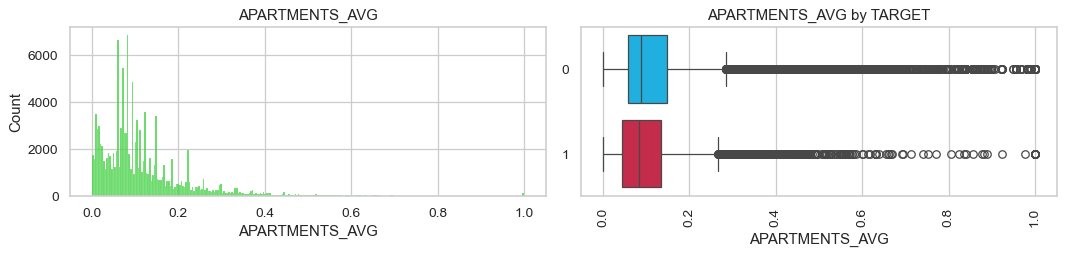

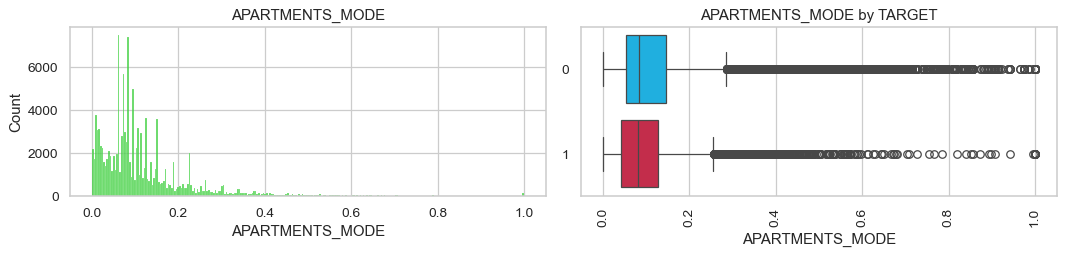

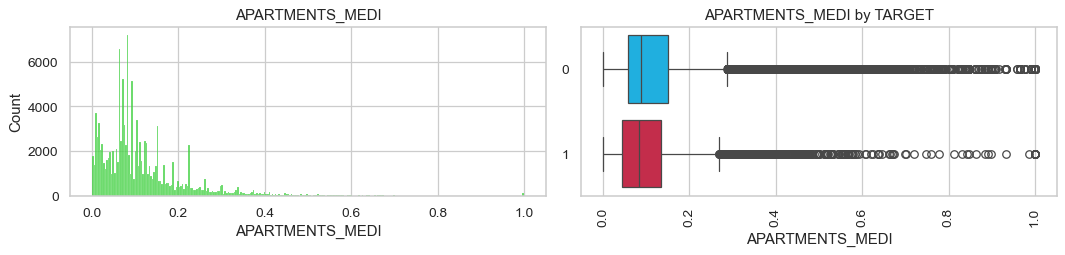

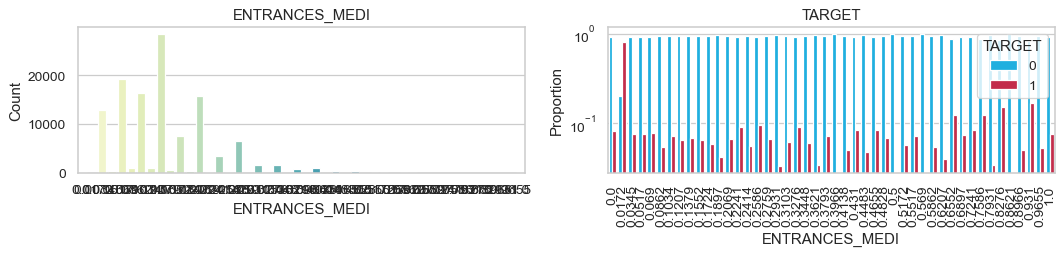

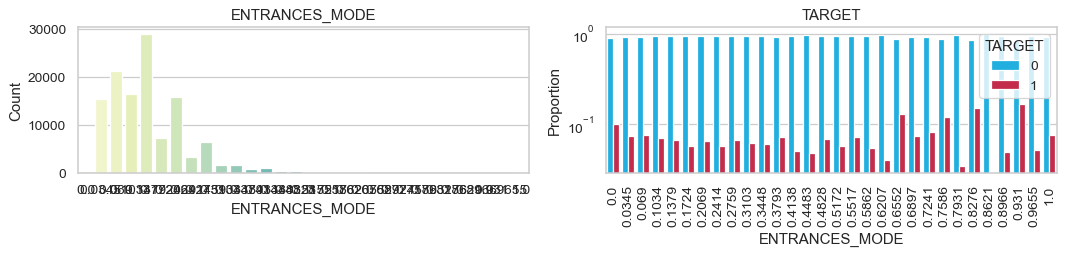

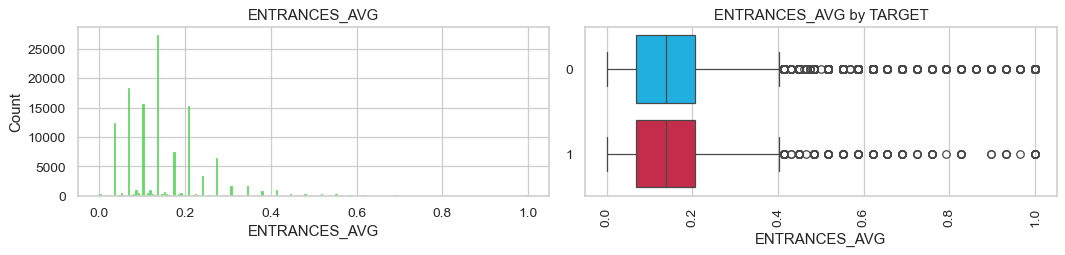

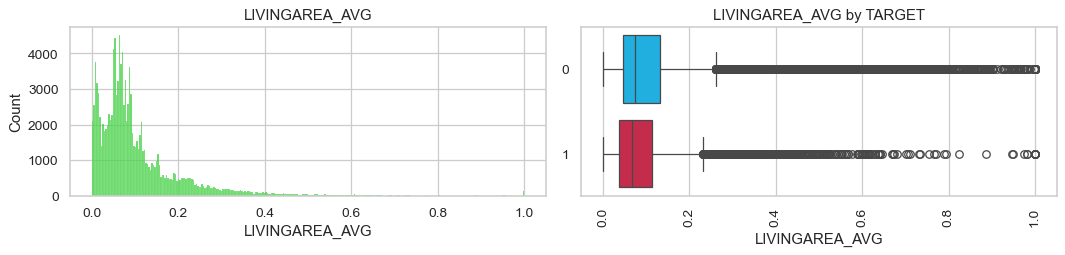

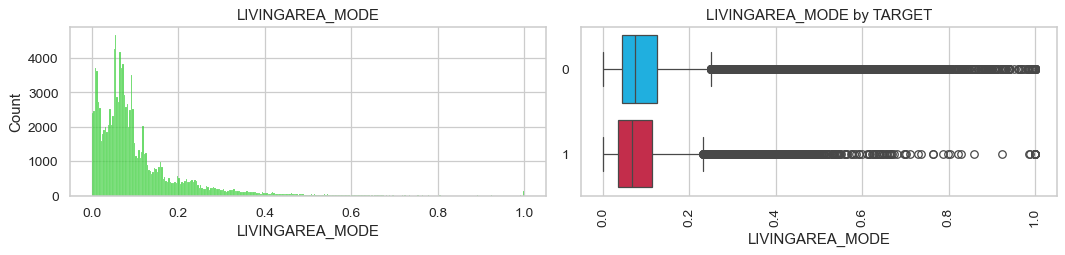

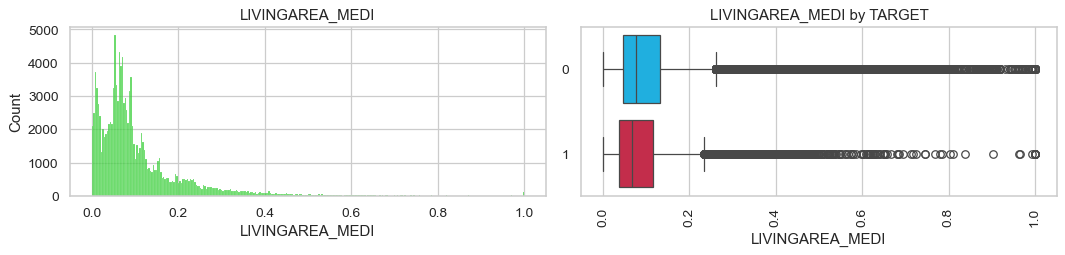

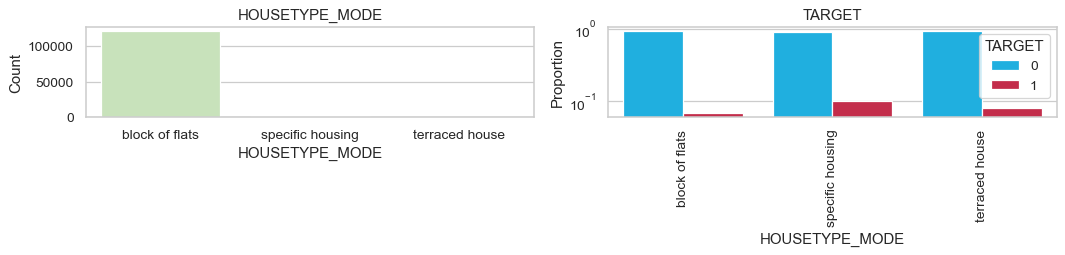

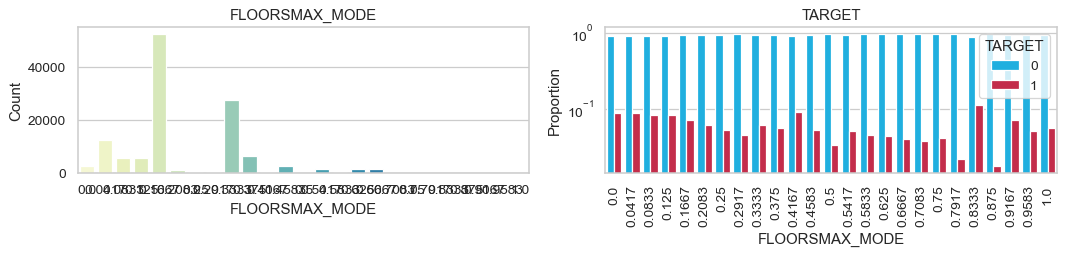

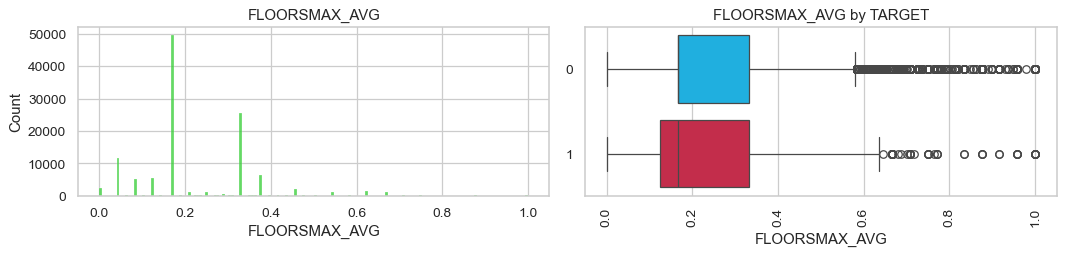

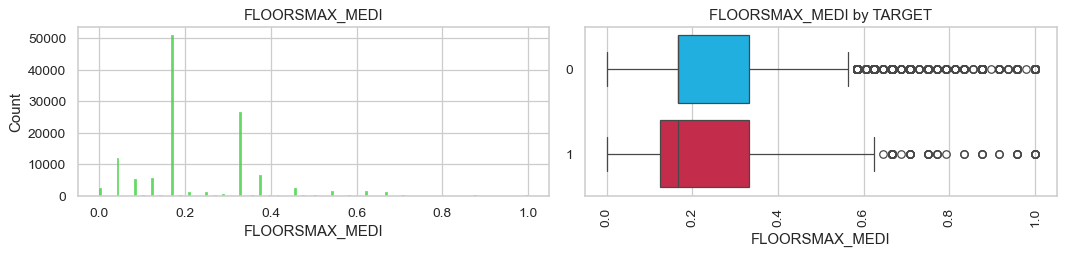

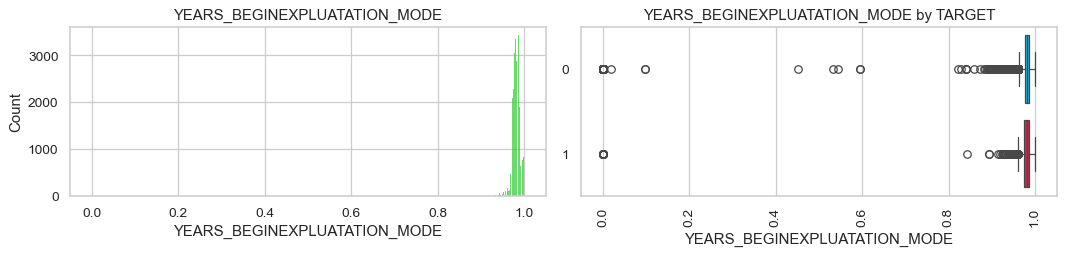

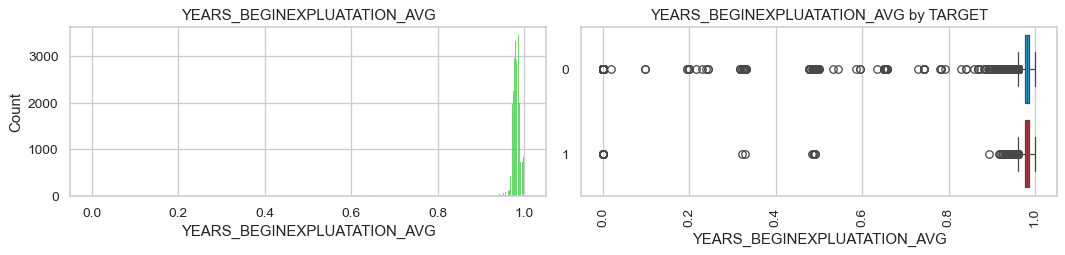

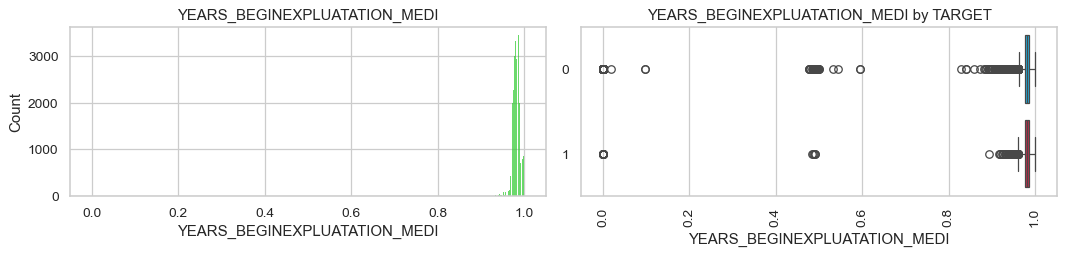

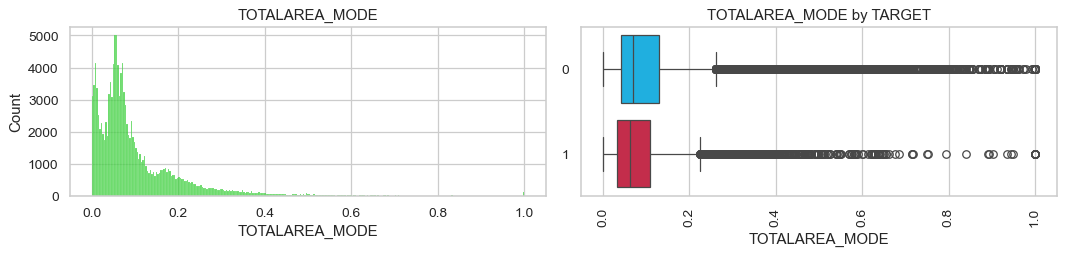

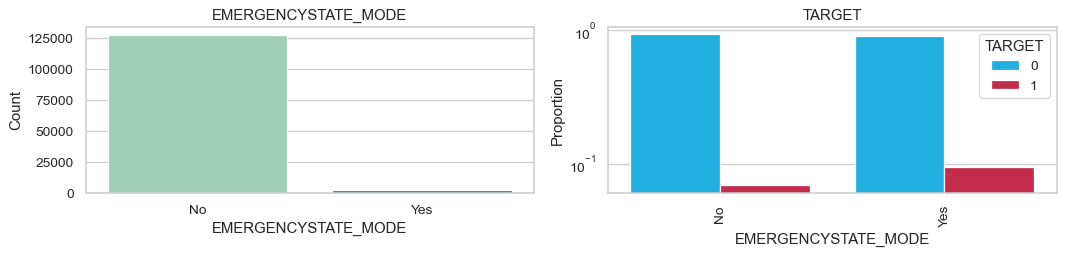

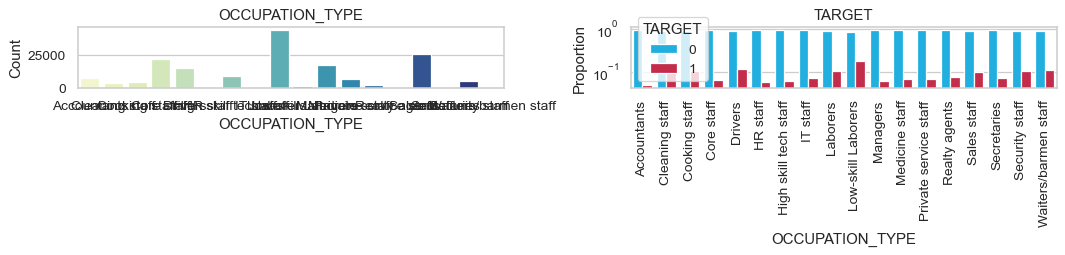

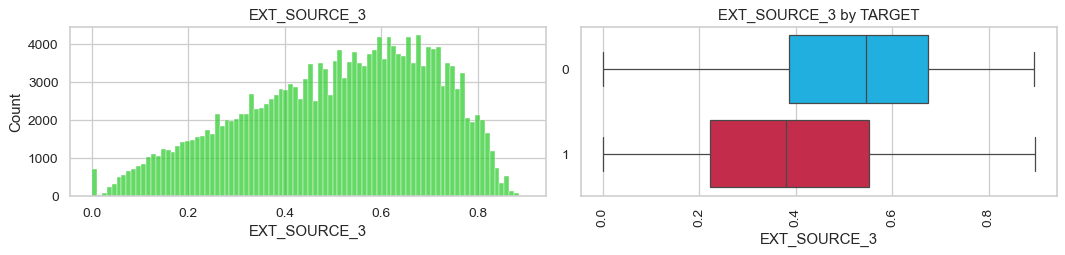

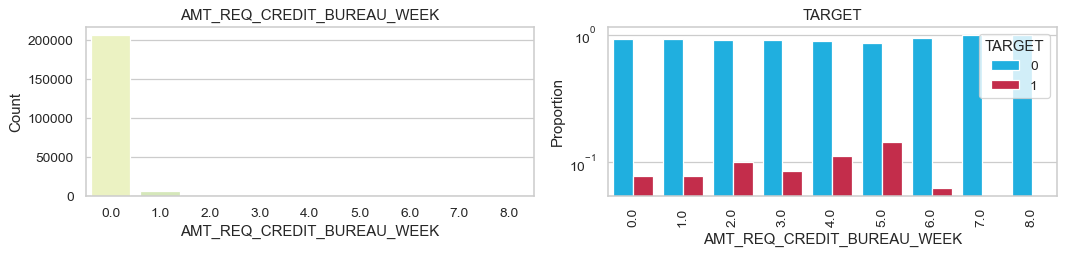

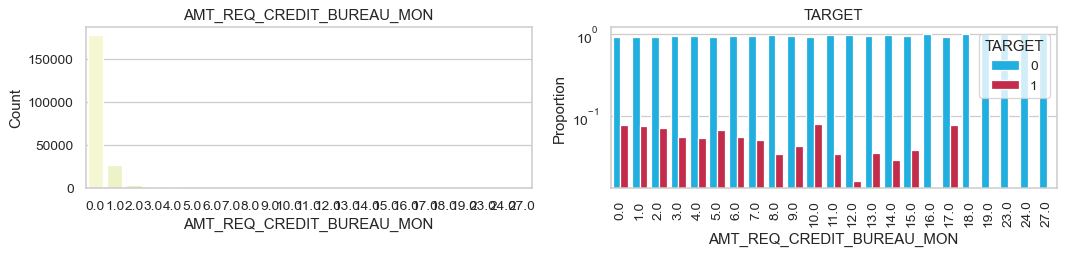

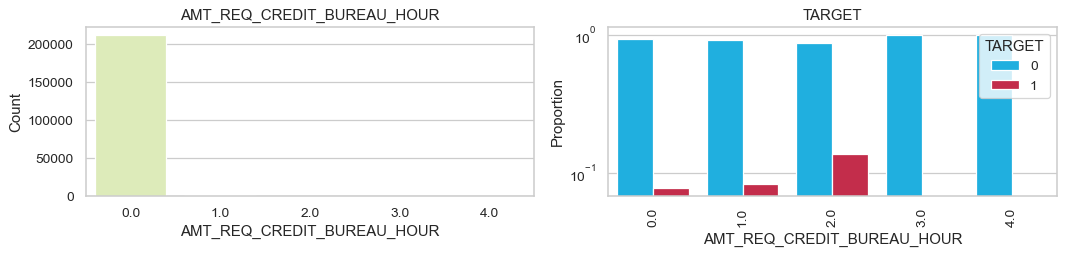

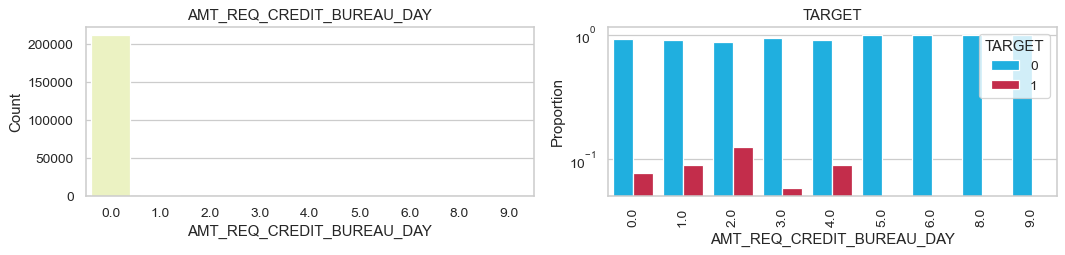

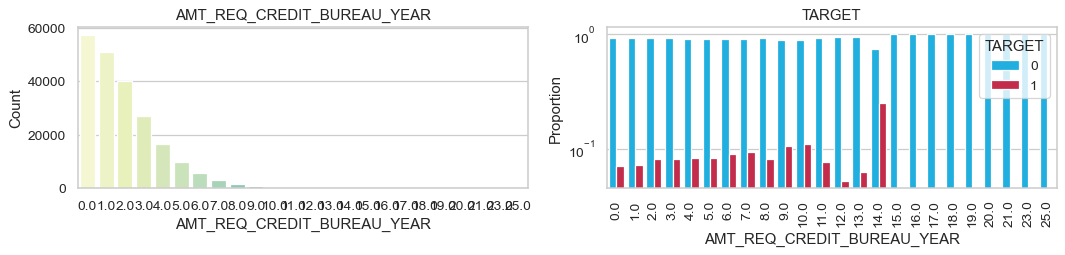

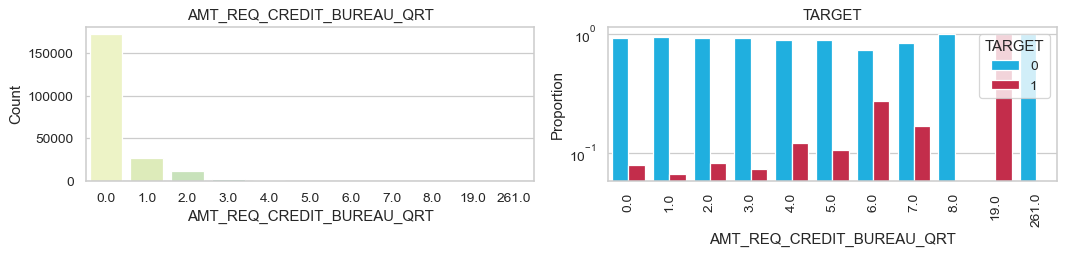

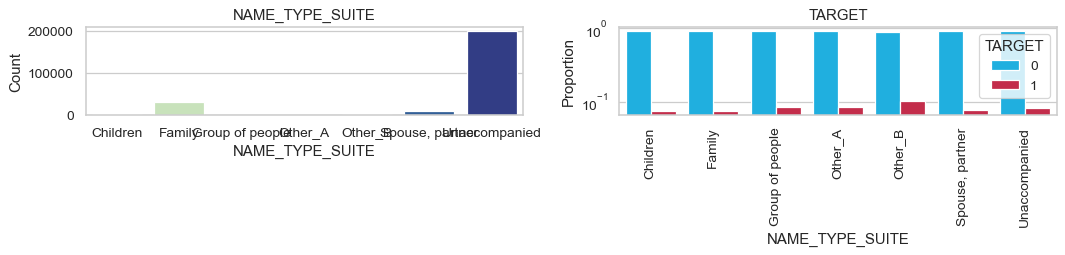

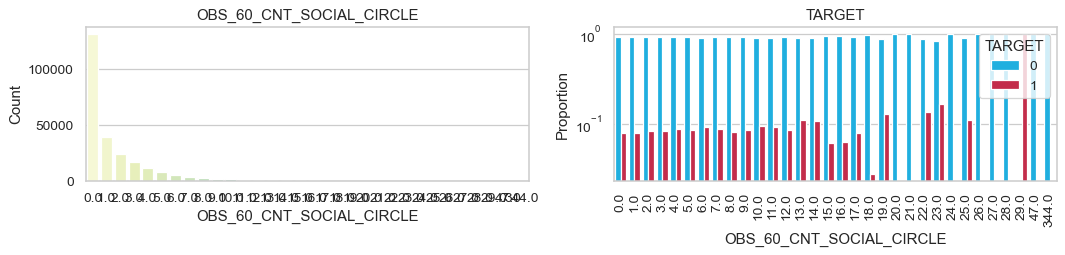

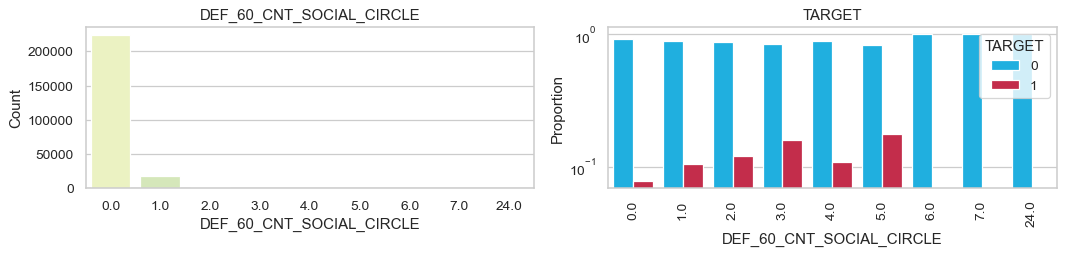

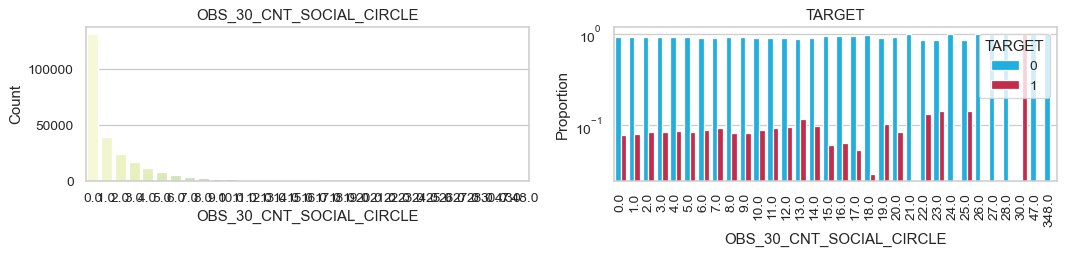

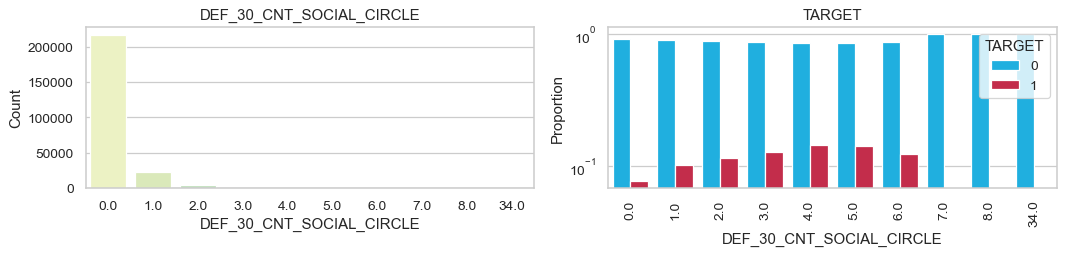

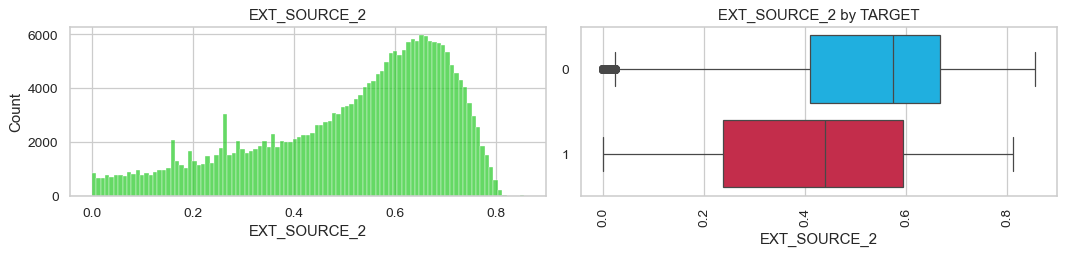

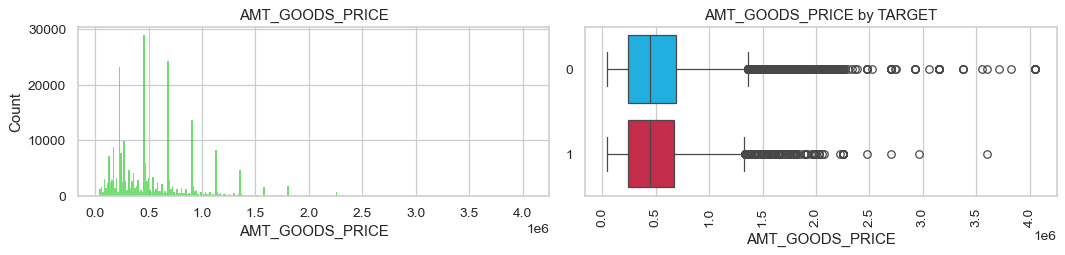

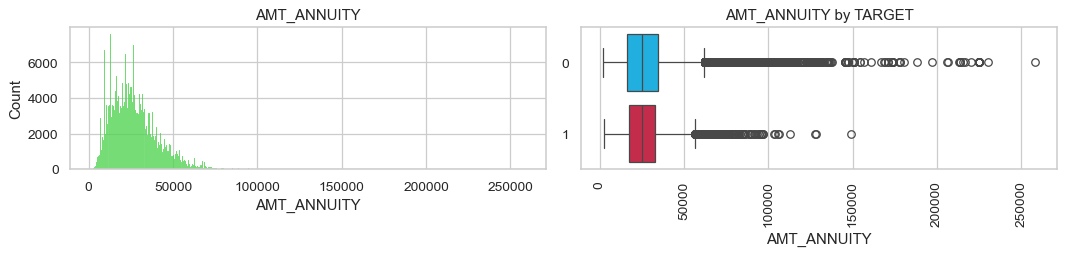

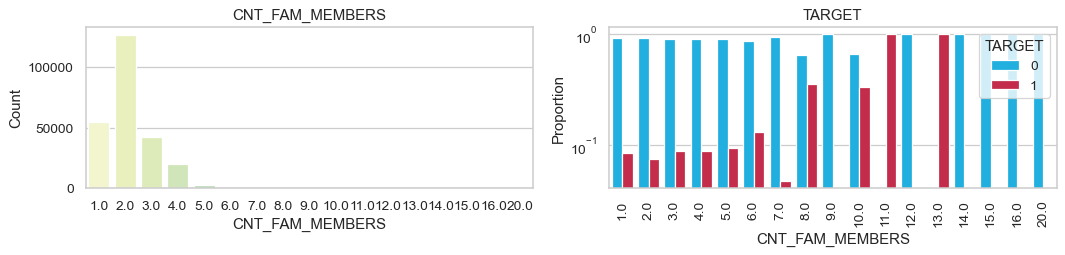

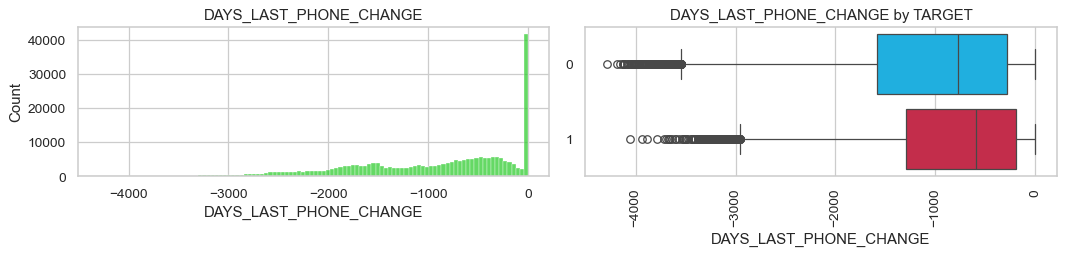

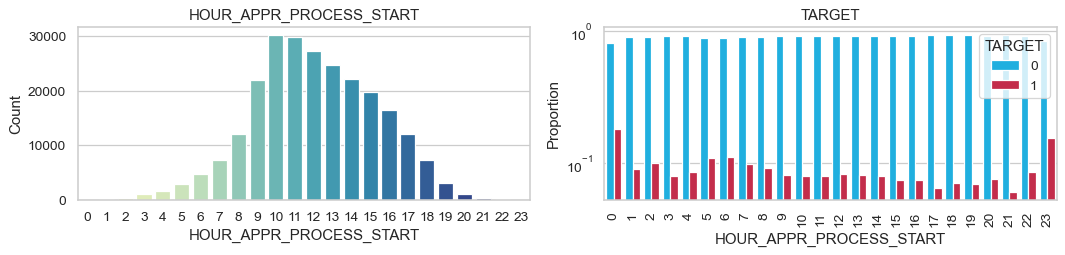

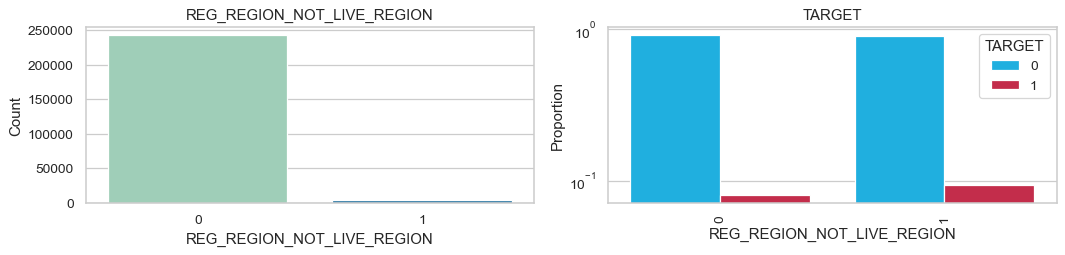

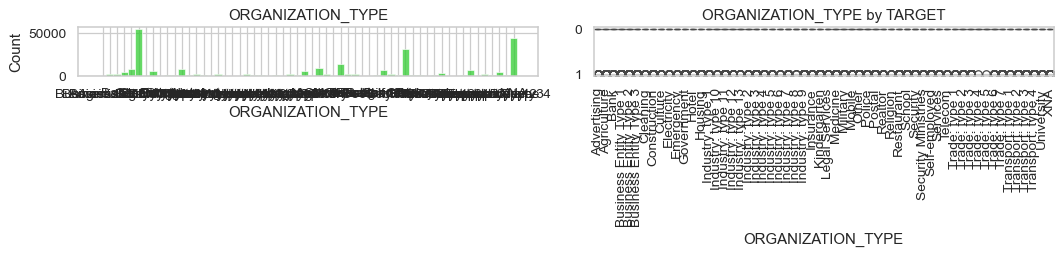

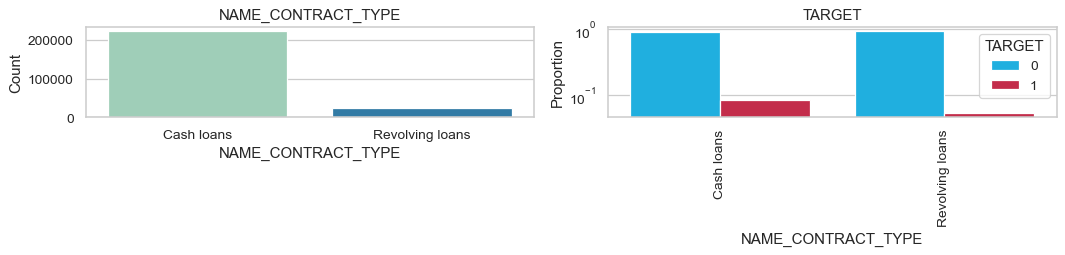

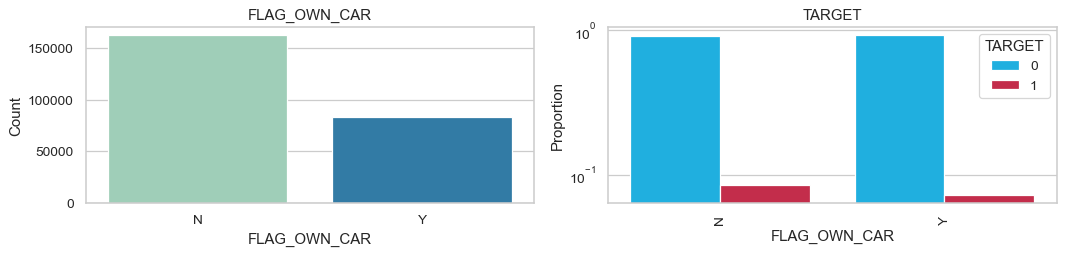

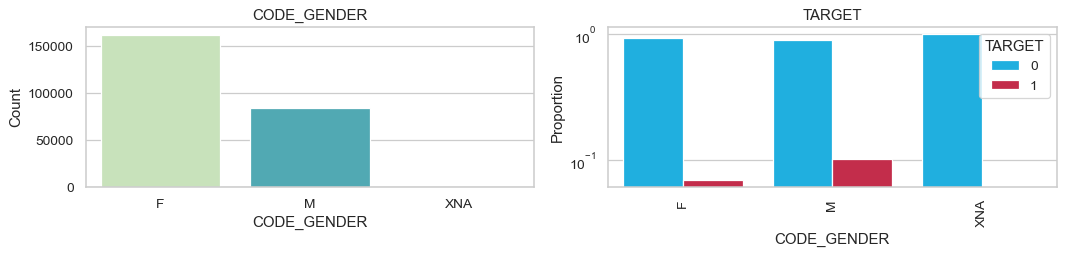

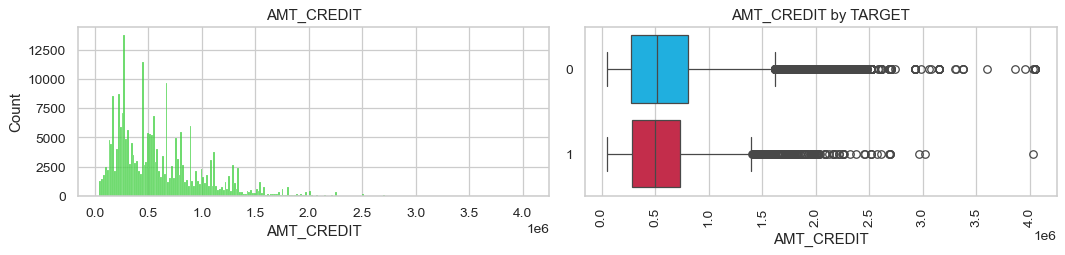

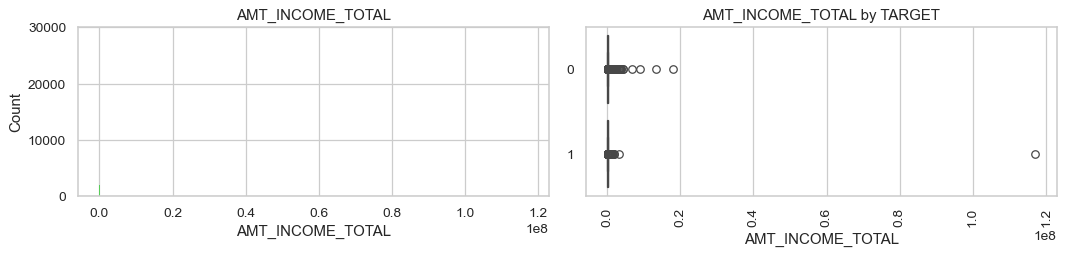

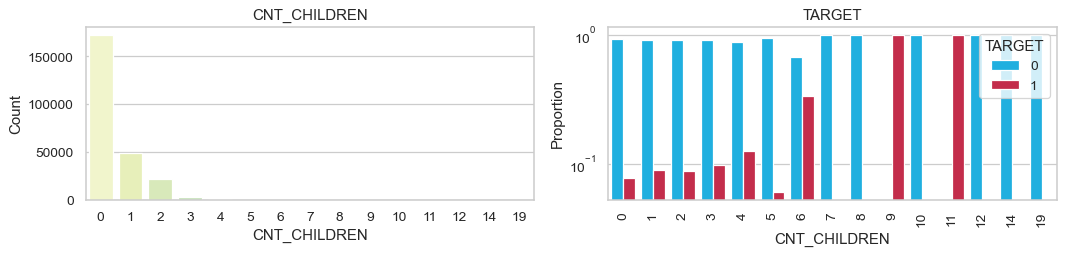

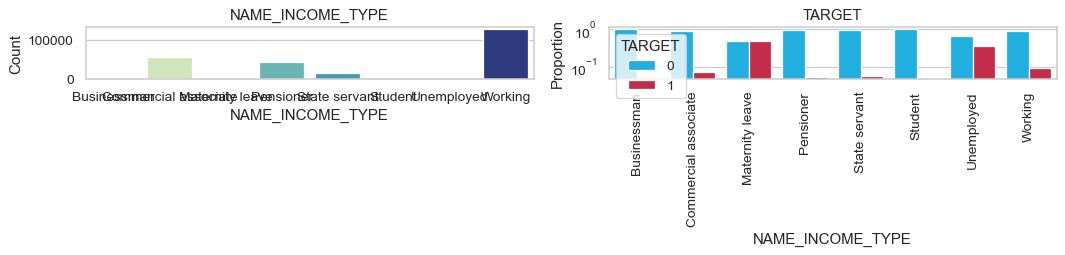

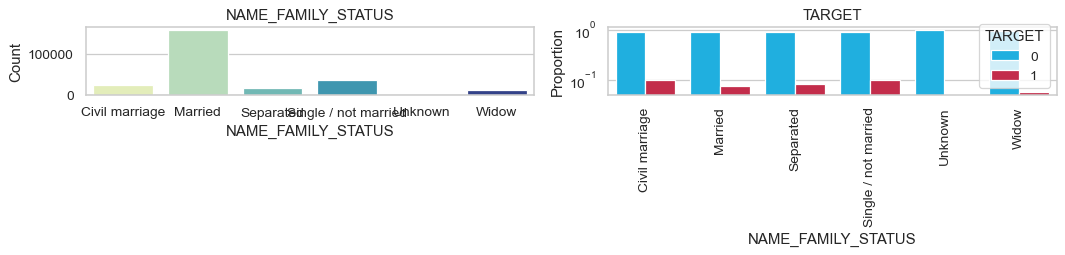

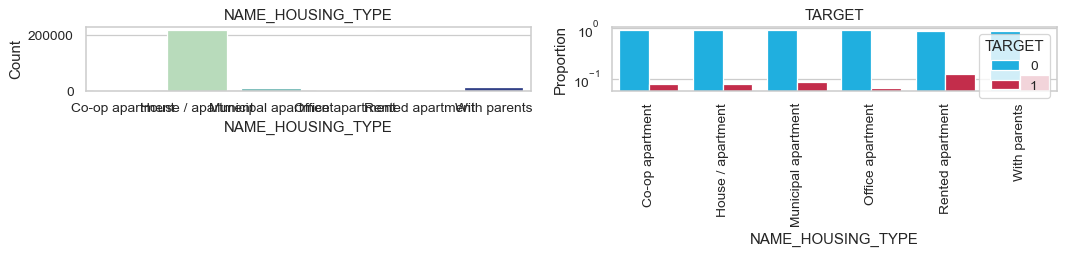

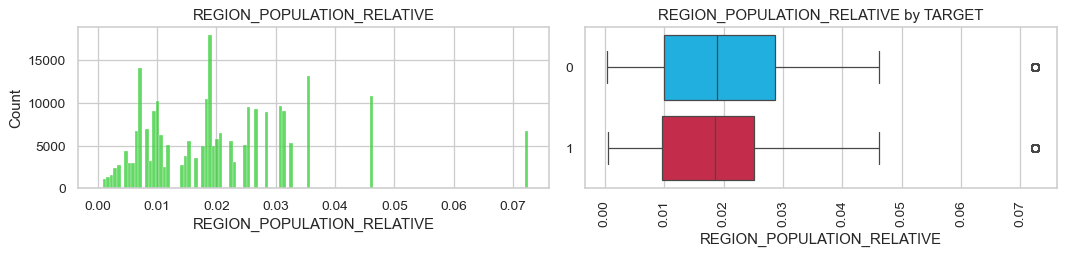

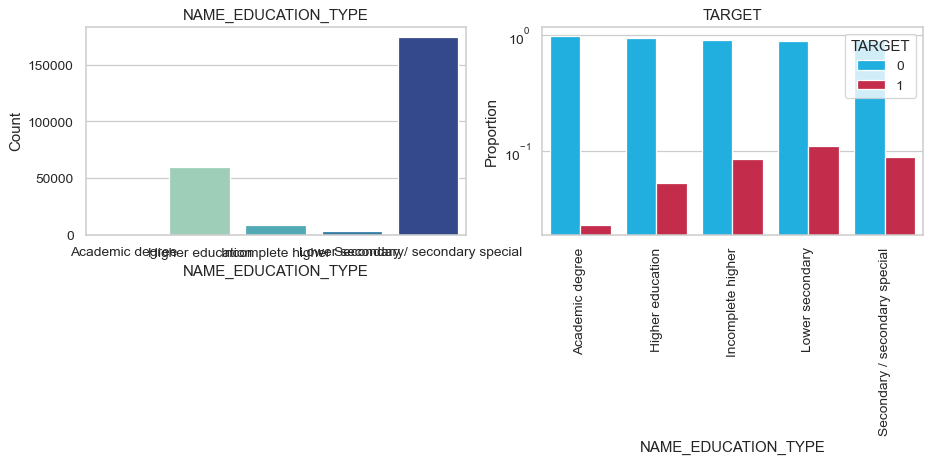

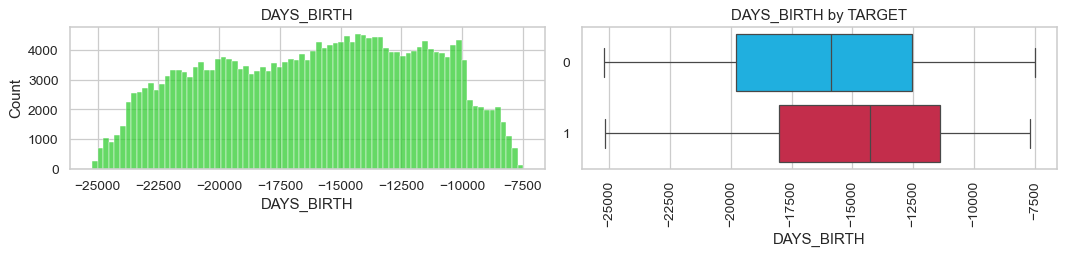

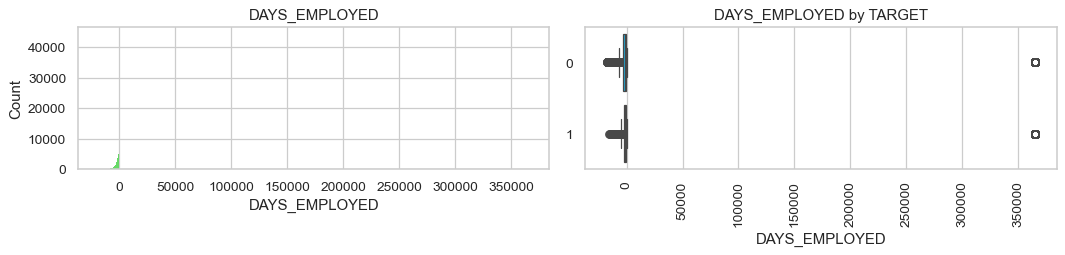

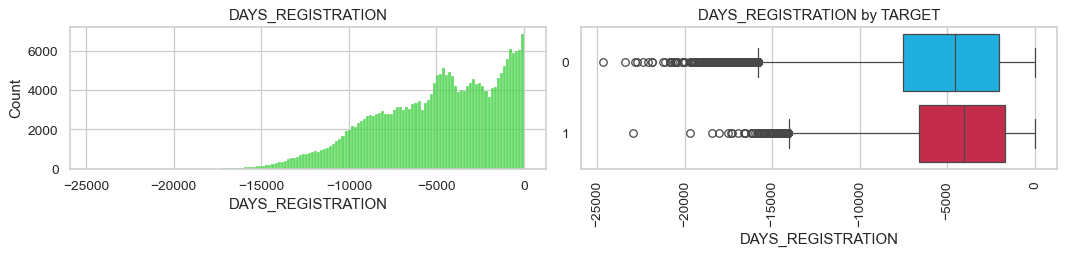

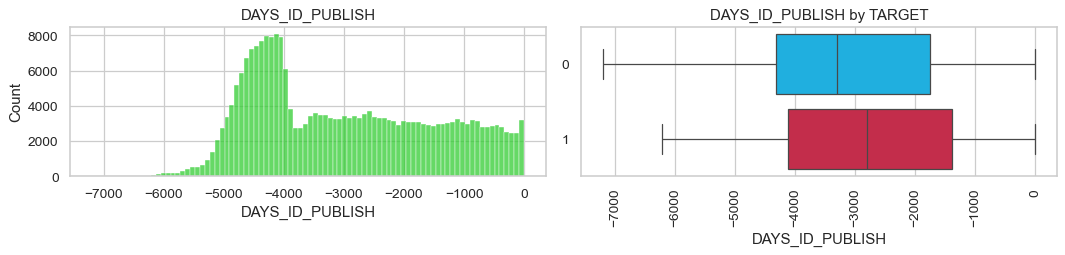

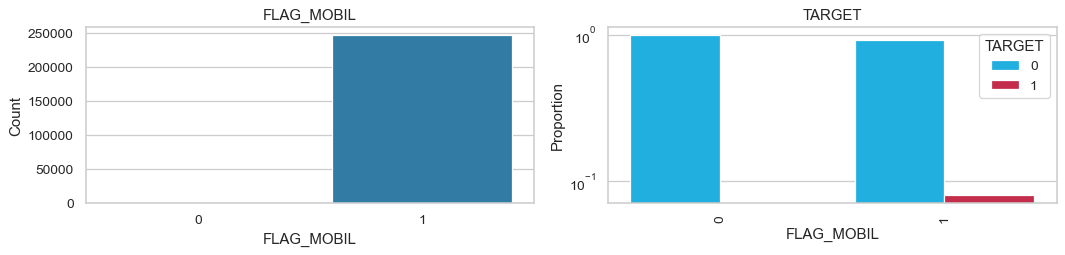

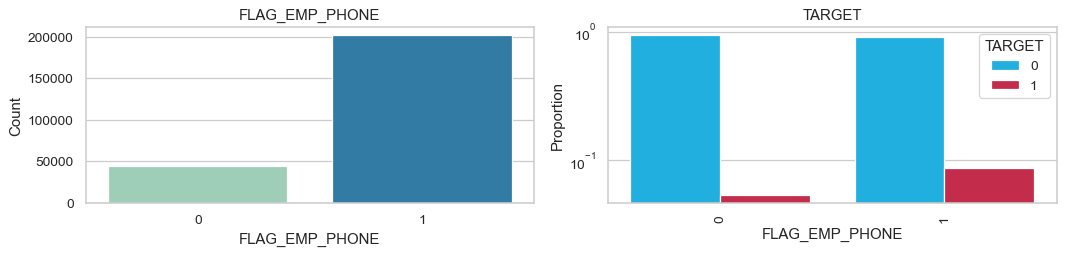

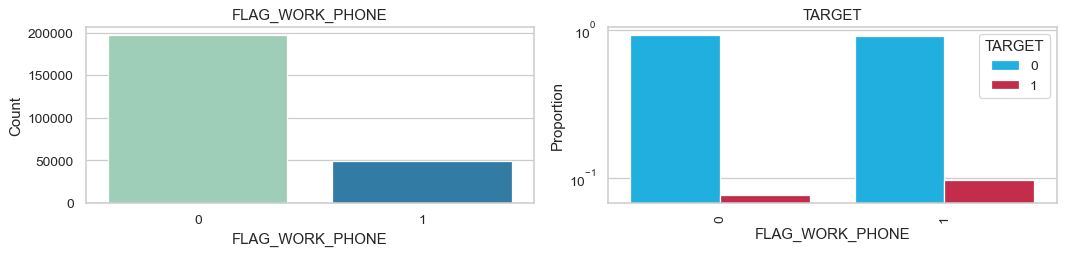

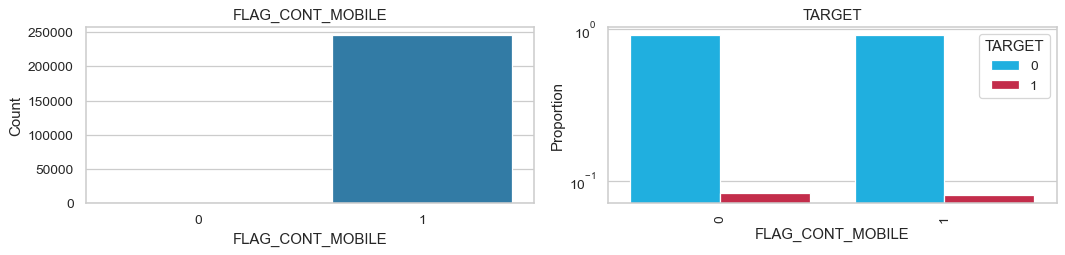

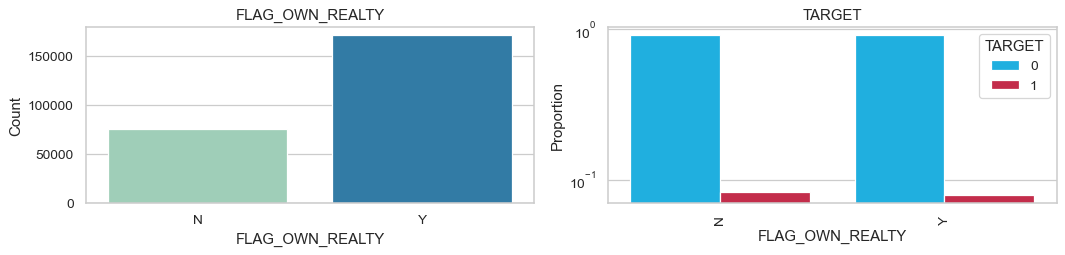

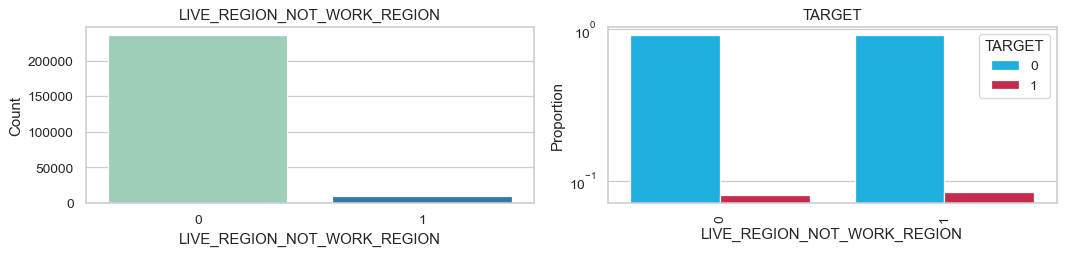

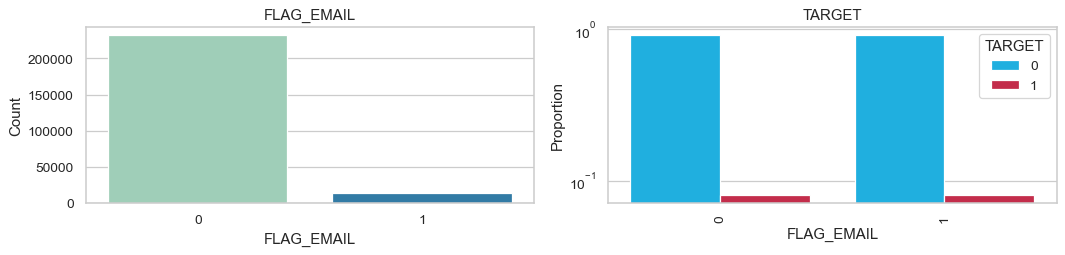

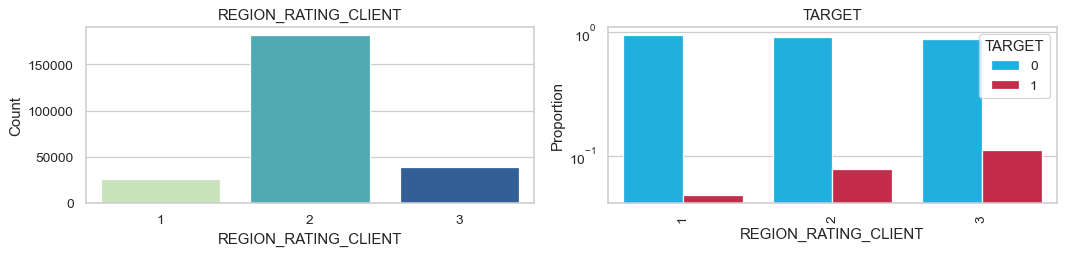

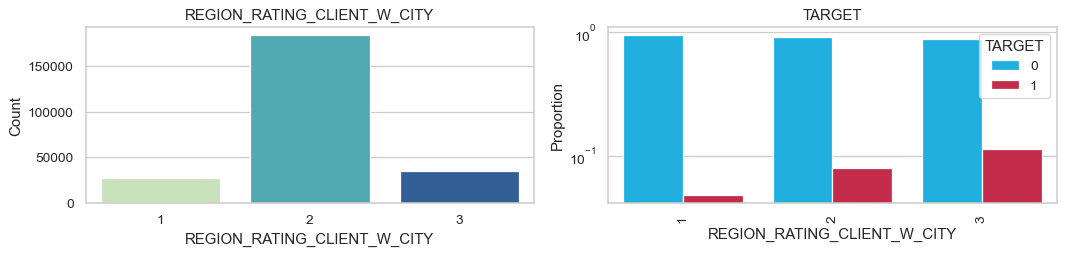

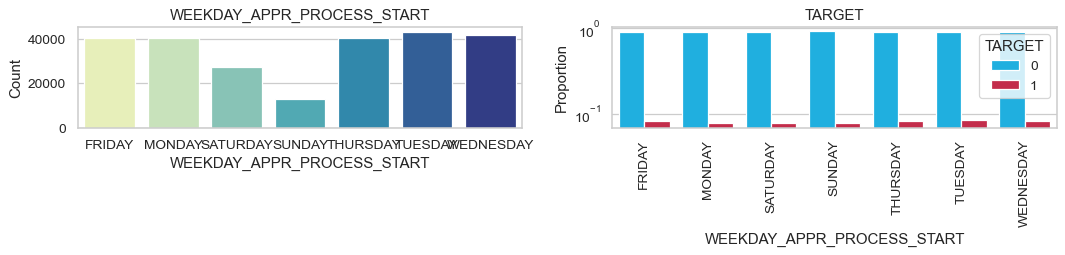

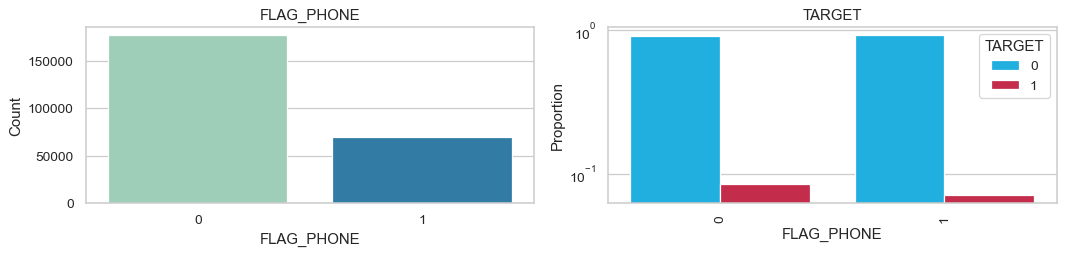

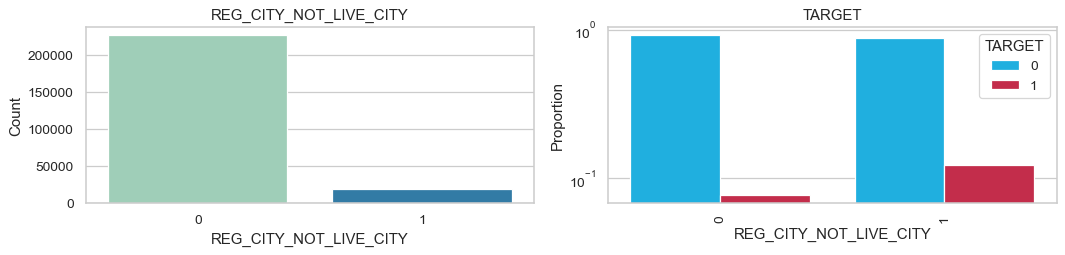

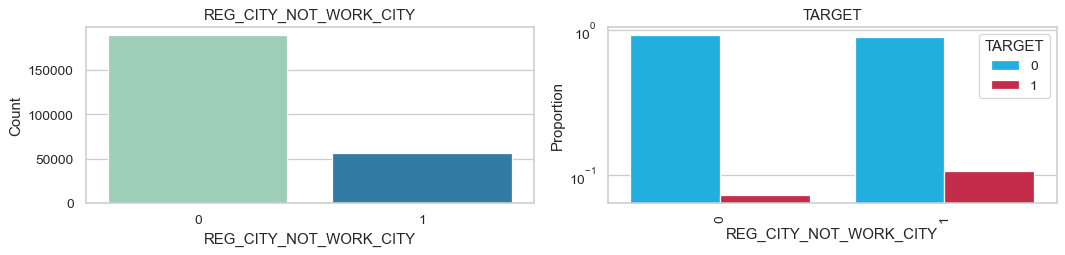

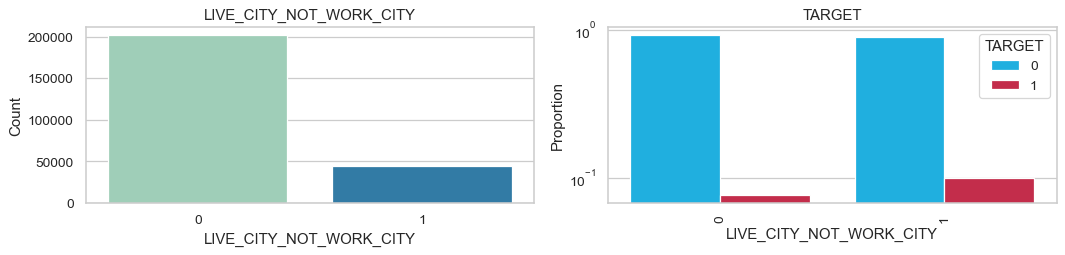

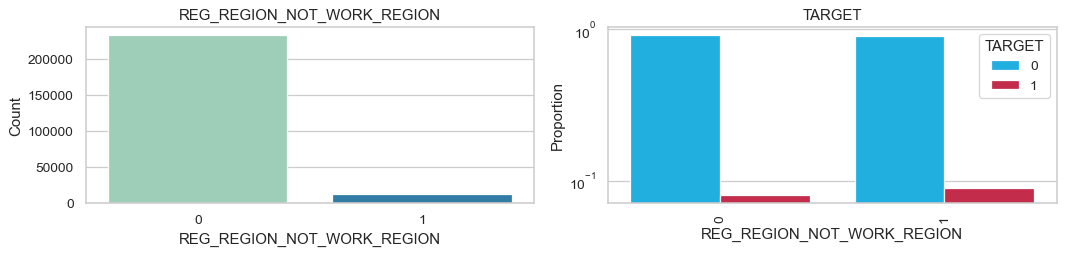

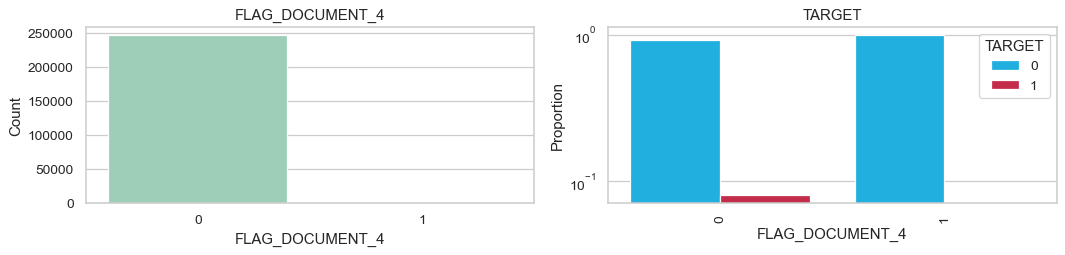

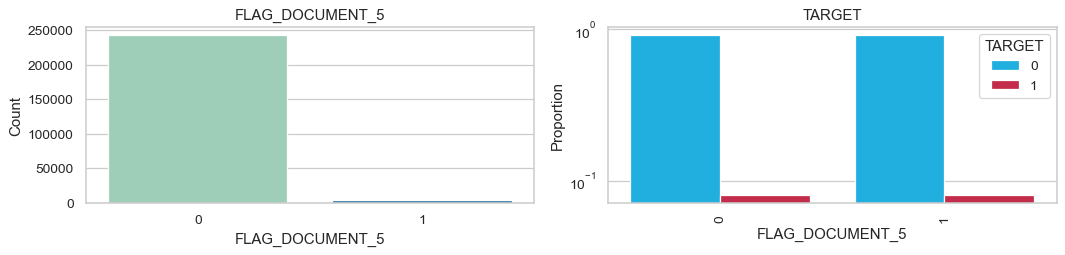

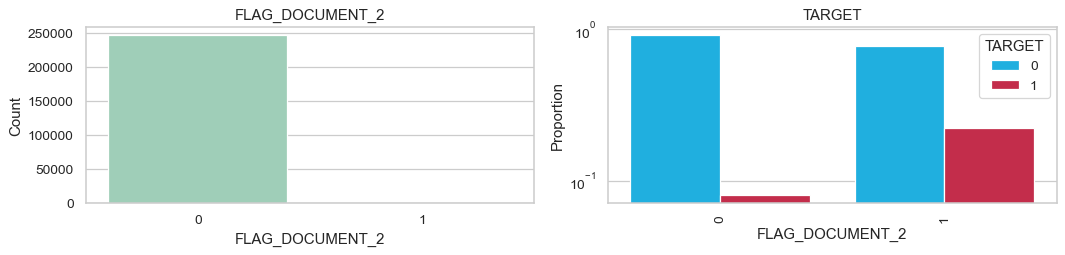

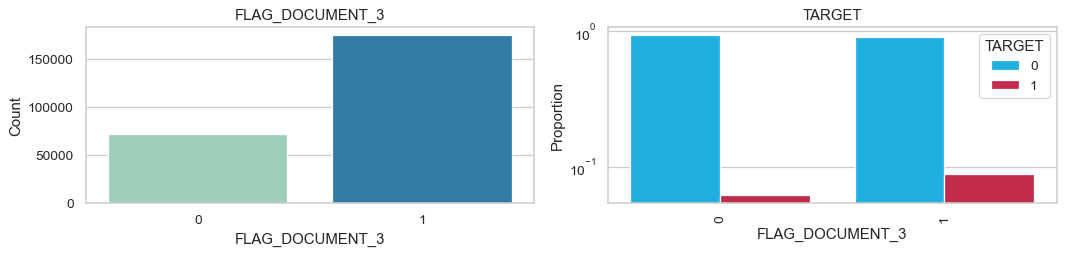

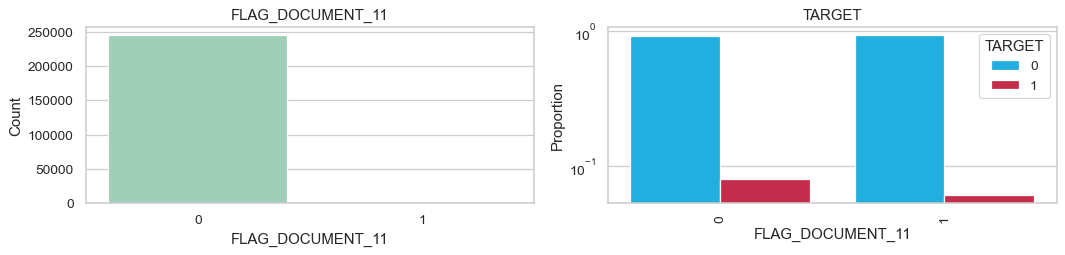

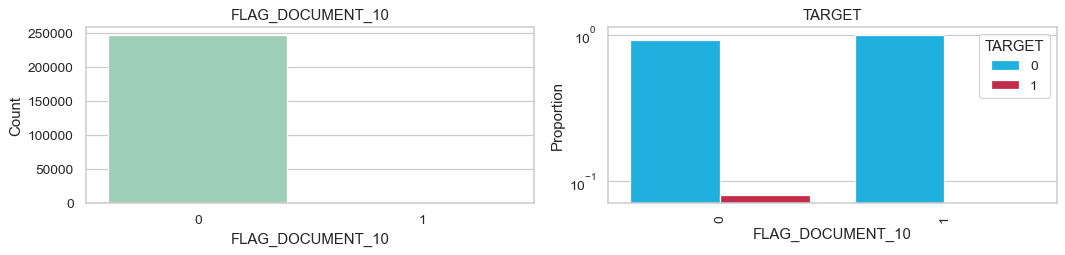

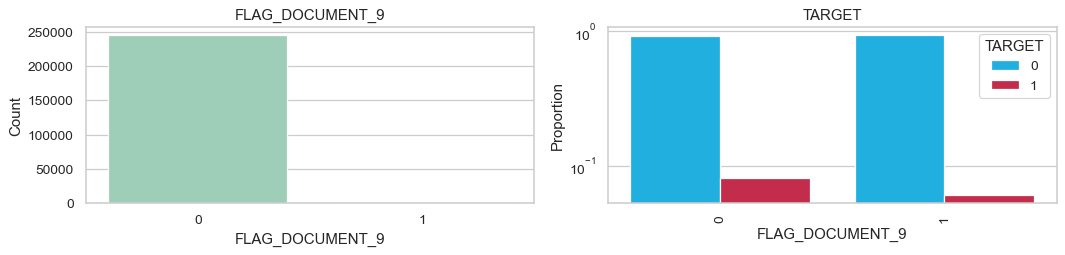

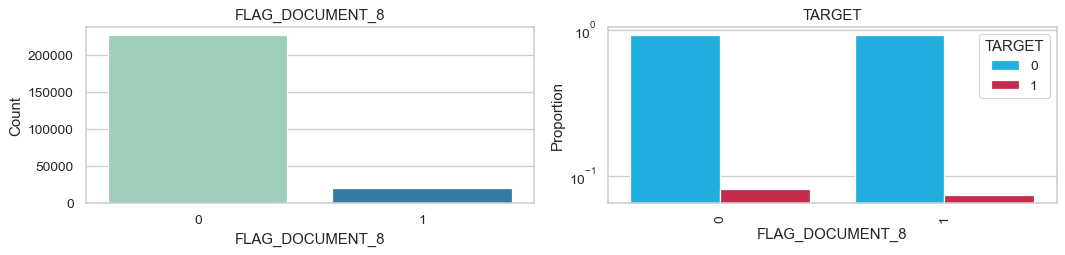

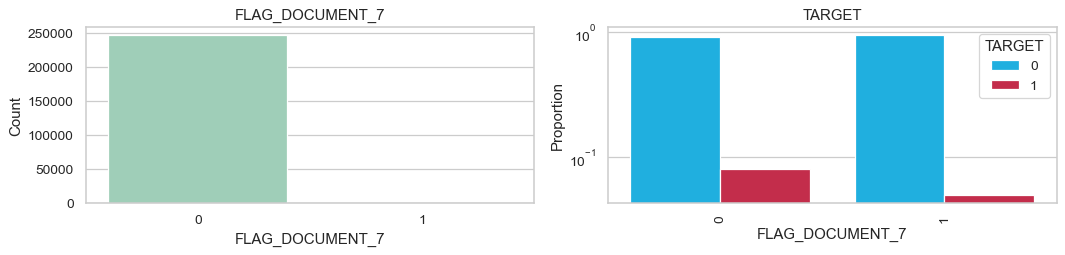

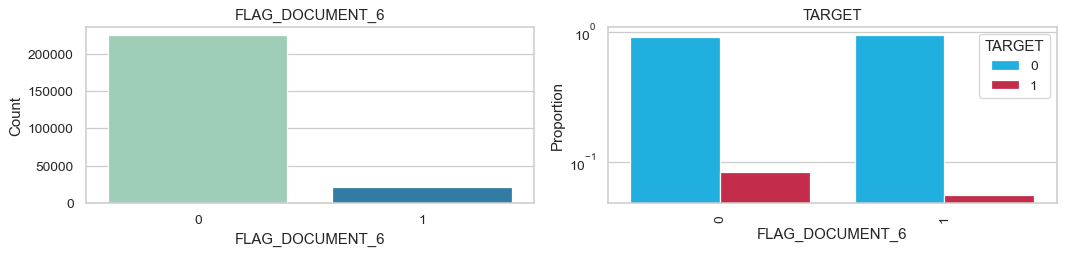

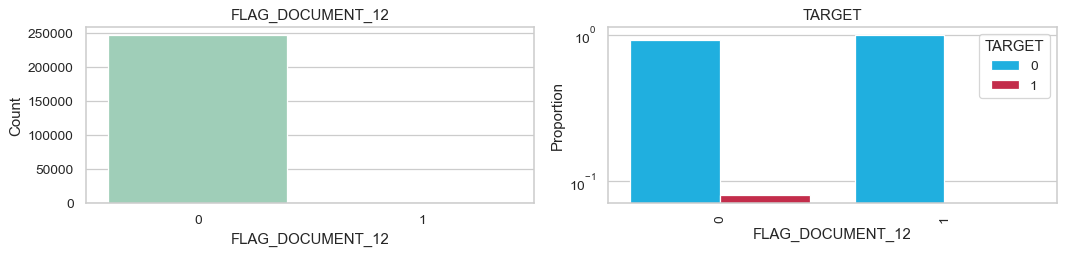

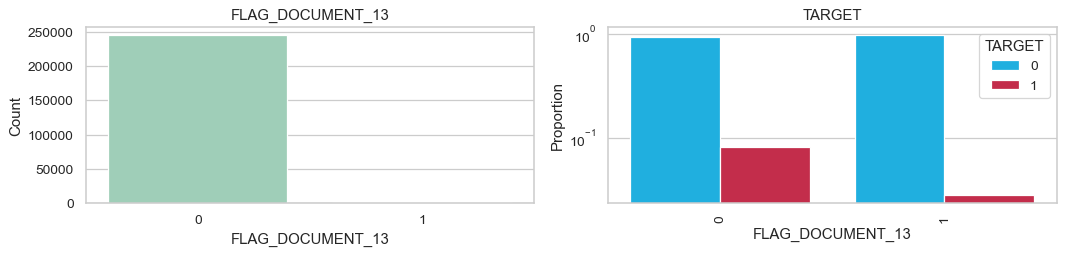

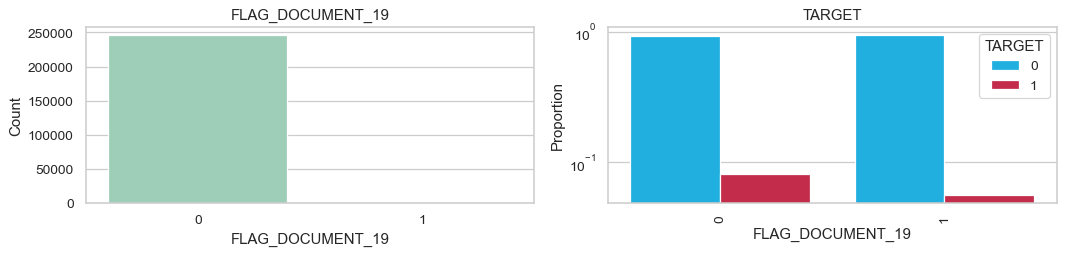

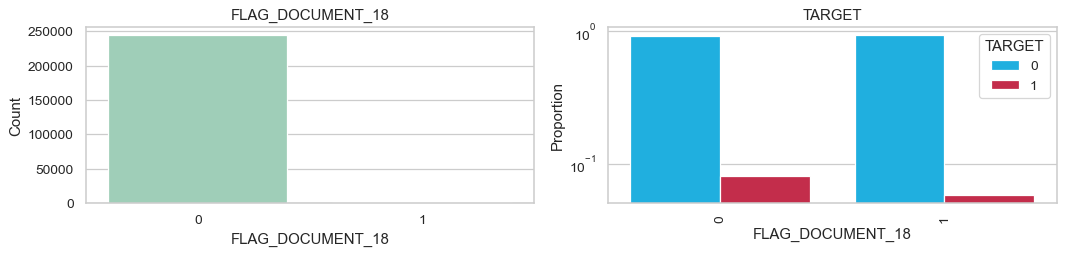

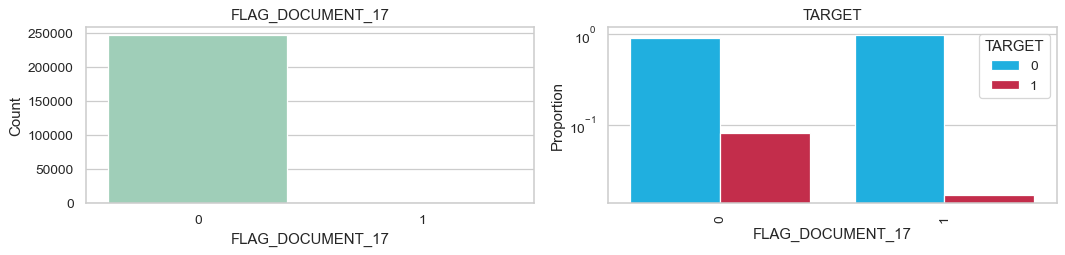

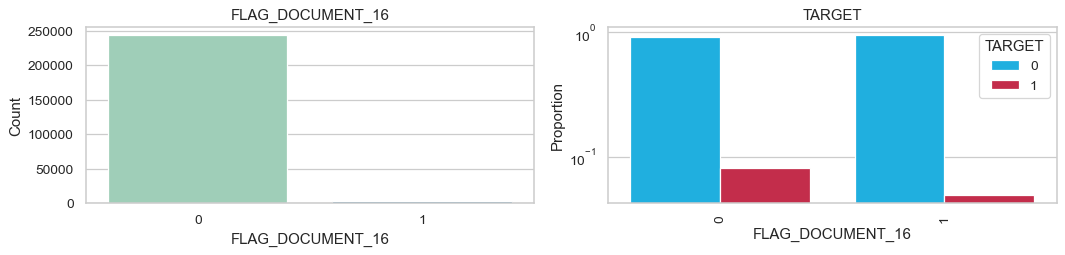

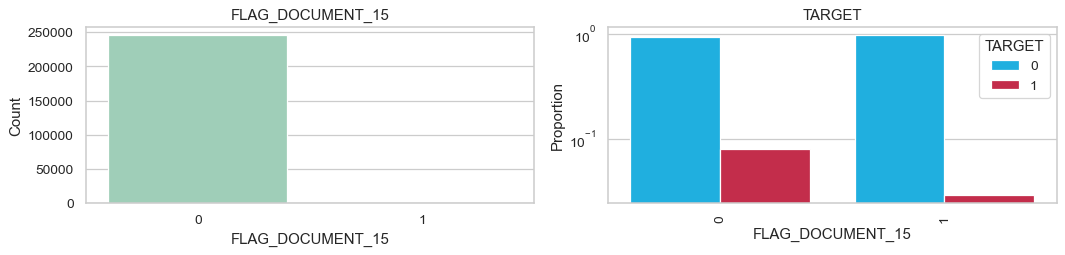

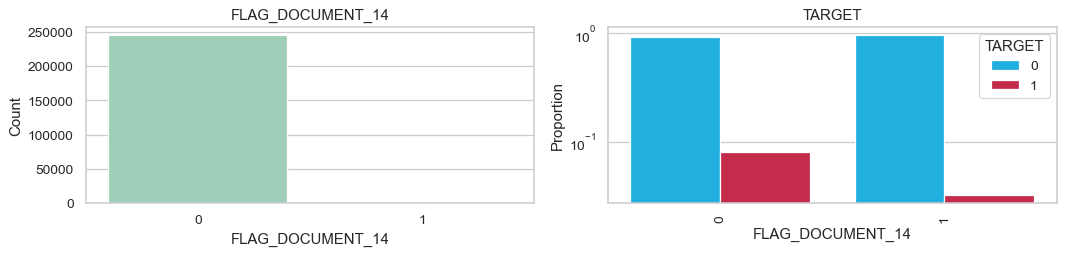

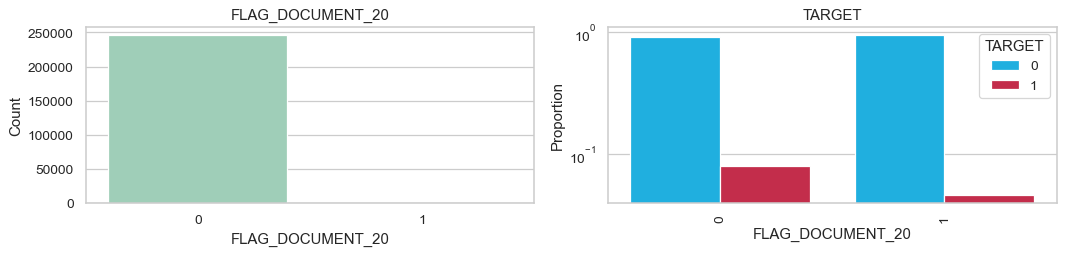

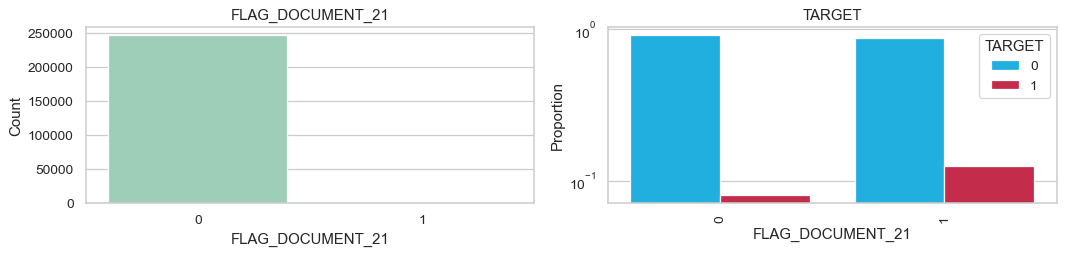

In [18]:
warnings.filterwarnings('ignore')
for i in list(df_loan_train.columns):
    if i in df_loan_num:
        f_aux.double_plot(df_loan_train, col_name=i, is_cont=True, target='TARGET')
    elif  ((i in df_loan_bool) | (i in df_loan_cat)) & (i!='TARGET'):
        f_aux.double_plot(df_loan_train, col_name=i, is_cont=False, target='TARGET')

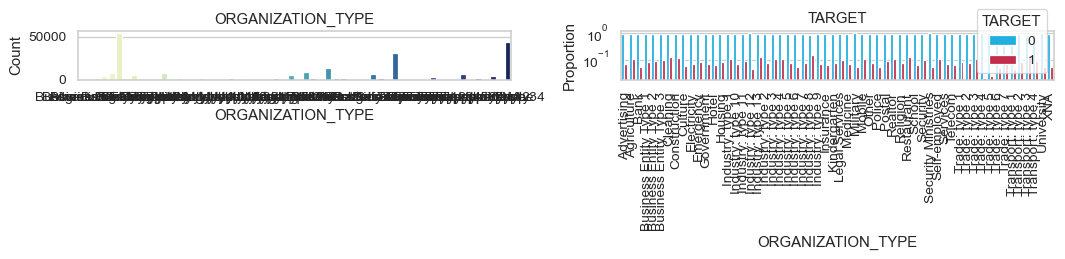

In [19]:
df_loan_train['ORGANIZATION_TYPE'] = df_loan_train['ORGANIZATION_TYPE'].astype('category')

f_aux.double_plot(df_loan_train, col_name='ORGANIZATION_TYPE', is_cont=False, target='TARGET')

### Análisis del gráfico

Cuando observamos las variables representadas visualmente, se dejan ver algunos detalles a tener en cuenta. Como el desbalanceo de la variable objetivo que ya había mencionado con anterioridad, o la cantidad de valores nulos de algunas variables que posteriormente transformaremos. Vamos a comentar el comportamiento de algunas variables en relación a nuestra variable objetivo TARGET.

1. Los clientes que tienen coches más antiguos se suelen retrasar en el pago del préstamo.
   
2. La dificultad en el pago del préstamo parece aumentar en los clientes con un score más bajo según la variable EXT_SOURCE_1, EXT_SOURCE_2 Y EXT_SOURCE_3 correspondiente a un score normalizado de una fuente de datos externa.

3. Los clientes con materiales de madera en las paredes de sus viviendas son los más propensos a retrasarse en el pago del préstamo.

4. Los clientes que tienen puestos de trabajo menos cualificados (low-skill laborers, drivers, waiters) presentan mayor probabilidad de retrasarse en el pago del préstamo.

5. Conforme aumenta el número de consultas de crédito antes de la solicitud del préstamo (AMT_REQ_CREDIT_BUREAU), más aumenta la probabilidad de que se retrase en la devolución del mismo.

6. Cuanto mayor es el tamaño de la familia del cliente más probabilidad en que se retrase en alguno de los pagos del préstamo.

7. Se puede observar que si el cliente cambió de teléfono móvil (DAYS_LAST_PHONE_CHANGE) hace relativamente poco tiempo, aumenta la probabilidad de que pueda tener dificultades en el pago del préstamo.

8. Los hombres son más propensos que las mujeres a tener dificultades en el pago del préstamo (CODE_GENDER).

9. Cuanto mayor sea la cantidad de hijos que tiene el cliente, mayor será la dificultad de pago que tendrá (CNT_CHILDREN).

10. Los clientes de baja por maternidad o desempleados son más propensos a tener dificultad en el pago del préstamo (NAME_INCOME_TYPE).

11. Los clientes con una mayor educación son menos propensos a tener dificultades a la hora de devolver el préstamo (NAME_EDUCATION_TYPE).

12. Parece que cuanto más jóven es el cliente (DAYS_BIRTH) tendrá más dificultades para el pago del préstamo.

13. Los clientes que cambiaron su documento de ID poco antes de solicitar el préstamo (DAYS_ID_PUBLISH), además de si cambió su registro (DAYS_REGISTRATION) poco antes de la solicitud del préstamo, tendrá más dificultades para el pago del mismo.

14. Cuanto mayor es el score de la región donde vive el cliente (REGION_RATING_CLIENT), mayor es la probabilidad de que tenga dificultades para el pago del préstamo.

15. Los clientes que dieron el FLAG_DOCUMENT_2 tienen mayor probabilidad de tener dificultades en el pago del préstamo.

## Tratamiento de variables continuas
### Tratamiento de outliers

In [16]:
f_aux.get_deviation_of_mean_perc(df_loan_train, list_var_continuous, target='TARGET', multiplier=3)

0.0       1.0                      variable  sum_outlier_values  \
0   0.944934  0.055066                COMMONAREA_AVG                1362   
1   0.944081  0.055919               COMMONAREA_MEDI                1377   
2   0.942322  0.057678               COMMONAREA_MODE                1335   
3   0.927973  0.072027       NONLIVINGAPARTMENTS_AVG                 597   
4   0.928934  0.071066      NONLIVINGAPARTMENTS_MEDI                 591   
5   0.921005  0.078995      NONLIVINGAPARTMENTS_MODE                 557   
6   0.944366  0.055634         LIVINGAPARTMENTS_MEDI                1420   
7   0.946352  0.053648          LIVINGAPARTMENTS_AVG                1398   
8   0.943526  0.056474         LIVINGAPARTMENTS_MODE                1452   
9   0.963824  0.036176                FLOORSMIN_MODE                 387   
10  0.961945  0.038055                 FLOORSMIN_AVG                 473   
11  0.961625  0.038375                FLOORSMIN_MEDI                 443   
12  0.930818  0.069182              YEARS_BUILD_MODE                 954   
13  0.929916  0.070084              YEARS_BUILD_MEDI                 956   
14  0.929025  0.070975               YEARS_BUILD_AVG                 944   
15  0.917469  0.082531                   OWN_CAR_AGE                2702   
16  0.936499  0.063501                 LANDAREA_MEDI                1685   
17  0.934258  0.065742                  LANDAREA_AVG                1658   
18  0.934272  0.065728                 LANDAREA_MODE                1704   
19  0.947816  0.052184             BASEMENTAREA_MODE                1648   
20  0.950789  0.049211              BASEMENTAREA_AVG                1585   
21  0.949906  0.050094             BASEMENTAREA_MEDI                1597   
22  0.948093  0.051907             NONLIVINGAREA_AVG                1888   
23  0.949223  0.050777            NONLIVINGAREA_MODE                1930   
24  0.947286  0.052714            NONLIVINGAREA_MEDI                1916   
25  0.955039  0.044961                ELEVATORS_MEDI                1935   
26  0.955270  0.044730                 ELEVATORS_AVG                1945   
27  0.951039  0.048961                ELEVATORS_MODE                2696   
28  0.950000  0.050000                APARTMENTS_AVG                2400   
29  0.949711  0.050289               APARTMENTS_MODE                2426   
30  0.949569  0.050431               APARTMENTS_MEDI                2439   
31  0.937675  0.062325                ENTRANCES_MEDI                1781   
32  0.940448  0.059552                ENTRANCES_MODE                2099   
33  0.938418  0.061582                 ENTRANCES_AVG                1770   
34  0.947451  0.052549                LIVINGAREA_AVG                2550   
35  0.946582  0.053418               LIVINGAREA_MODE                2677   
36  0.948350  0.051650               LIVINGAREA_MEDI                2575   
37  0.957700  0.042300                FLOORSMAX_MODE                2104   
38  0.956563  0.043437                 FLOORSMAX_AVG                2095   
39  0.956024  0.043976                FLOORSMAX_MEDI                2183   
40  0.903636  0.096364  YEARS_BEGINEXPLUATATION_MODE                 550   
41  0.905357  0.094643   YEARS_BEGINEXPLUATATION_AVG                 560   
42  0.900376  0.099624  YEARS_BEGINEXPLUATATION_MEDI                 532   
43  0.953915  0.046085                TOTALAREA_MODE                2669   
44  0.926526  0.073474    AMT_REQ_CREDIT_BUREAU_WEEK                6846   
45  0.950927  0.049073     AMT_REQ_CREDIT_BUREAU_MON                2588   
46  0.920463  0.079537    AMT_REQ_CREDIT_BUREAU_HOUR                1295   
47  0.906068  0.093932     AMT_REQ_CREDIT_BUREAU_DAY                1203   
48  0.908990  0.091010    AMT_REQ_CREDIT_BUREAU_YEAR                2692   
49  0.917486  0.082514     AMT_REQ_CREDIT_BUREAU_QRT                1830   
50  0.909719  0.090281      OBS_60_CNT_SOCIAL_CIRCLE                4774   
51  0.874524  0.125476      DEF_60_CNT_SOCIAL_CIRCLE     

- Las variables a destacar son 'AMT_CREDIT' siendo la cantidad total de dinero prestado al cliente y 'AMT_INCOME_TOTAL' siendo el ingreso total del cliente, pues estos valores pueden representar una importancia relativa en la variable 'TARGET'. Si tenemos en cuenta que el valor de nuestra variable target es que exista aproximadamente un 8% de dificultad de pago, no tendremos que preocuparnos por la cantidad de outliers que tenemos. La cantidad de outliers habrá que tenerla en cuenta pero a priori no deberían de afectar a las conclusiones finales debido a la cantidad tan reducida.

En otra instancia, destacar que los porcentajes de outliers son muy bajos prácticamente en todas las variables y no deberían de afectar significativamente a los resultados por lo que, por ahora procederé a mantenerlos.

### Análisis de correlación entre las variables

#### Matriz de correlación para variables numéricas

In [17]:
corr = pd.concat([df_loan_train.select_dtypes('number').drop(df_loan_bool, axis=1), df_loan_train['TARGET']], axis=1).corr(method='pearson')
corr

SK_ID_CURR  COMMONAREA_AVG  COMMONAREA_MEDI  \
SK_ID_CURR                      1.000000       -0.001792        -0.001292   
COMMONAREA_AVG                 -0.001792        1.000000         0.995648   
COMMONAREA_MEDI                -0.001292        0.995648         1.000000   
COMMONAREA_MODE                -0.001394        0.976698         0.979693   
NONLIVINGAPARTMENTS_AVG        -0.000714        0.102382         0.102280   
NONLIVINGAPARTMENTS_MEDI       -0.001322        0.101833         0.102675   
NONLIVINGAPARTMENTS_MODE       -0.000361        0.100260         0.101341   
LIVINGAPARTMENTS_MEDI           0.005473        0.532773         0.535433   
LIVINGAPARTMENTS_AVG            0.005567        0.531825         0.532263   
LIVINGAPARTMENTS_MODE           0.005116        0.525657         0.528801   
FLOORSMIN_MODE                  0.003223        0.287227         0.285748   
FLOORSMIN_AVG                   0.004389        0.293842         0.292169   
FLOORSMIN_MEDI                  0.004089        0.292796         0.291257   
YEARS_BUILD_MODE                0.006995        0.232387         0.233554   
YEARS_BUILD_MEDI                0.007406        0.234797         0.235719   
YEARS_BUILD_AVG                 0.007400        0.235222         0.235782   
OWN_CAR_AGE                     0.001217       -0.035993        -0.035531   
LANDAREA_MEDI                   0.001999        0.258492         0.260876   
LANDAREA_AVG                    0.001976        0.258411         0.260487   
LANDAREA_MODE                   0.001822        0.246392         0.249500   
BASEMENTAREA_MODE              -0.001694        0.388121         0.390927   
BASEMENTAREA_AVG               -0.002316        0.404637         0.405755   
BASEMENTAREA_MEDI              -0.001924        0.403363         0.405527   
EXT_SOURCE_1                    0.000105        0.029297         0.027840   
NONLIVINGAREA_AVG               0.005253        0.230997         0.230830   
NONLIVINGAREA_MODE              0.003531        0.219056         0.220992   
NONLIVINGAREA_MEDI              0.004511        0.229734         0.231113   
ELEVATORS_MEDI                  0.007268        0.518096         0.519891   
ELEVATORS_AVG                   0.007026        0.519659         0.519406   
ELEVATORS_MODE                  0.007423        0.504415         0.506018   
APARTMENTS_AVG                  0.004033        0.536306         0.537054   
APARTMENTS_MODE                 0.004107        0.515171         0.518274   
APARTMENTS_MEDI                 0.004341        0.535413         0.538237   
ENTRANCES_MEDI                 -0.002637        0.319945         0.322703   
ENTRANCES_MODE                 -0.003044        0.299876         0.302825   
ENTRANCES_AVG                  -0.003010        0.322515         0.323996   
LIVINGAREA_AVG                  0.003277        0.545561         0.546421   
LIVINGAREA_MODE                 0.003558        0.524451         0.527445   
LIVINGAREA_MEDI                 0.003752        0.544104         0.546869   
FLOORSMAX_MODE                  0.006219        0.398228         0.397386   
FLOORSMAX_AVG                   0.006700        0.404207         0.402853   
FLOORSMAX_MEDI                  0.006427        0.402319         0.401479   
YEARS_BEGINEXPLUATATION_MODE    0.000692        0.046435         0.046518   
YEARS_BEGINEXPLUATATION_AVG     0.000462        0.091297         0.091505   
YEARS_BEGINEXPLUATATION_MEDI    0.000466        0.074524         0.074725   
TOTALAREA_MODE                  0.004470        0.551732         0.551000   
EXT_SOURCE_3                   -0.001351       -0.006961        -0.007169   
AMT_REQ_CREDIT_BUREAU_WEEK      0.000909       -0.009128        -0.009413   
AMT_REQ_CREDIT_BUREAU_MON       0.000839        0.023225         0.022828   
AMT_REQ_CREDIT_BUREAU_HOUR     -0.002629        0.007738         0.007852   
AMT_REQ_CREDIT_BUREAU_DAY      -0.000519        0.007019         0.007121   
AMT_REQ_CREDIT_BUREAU_YEAR

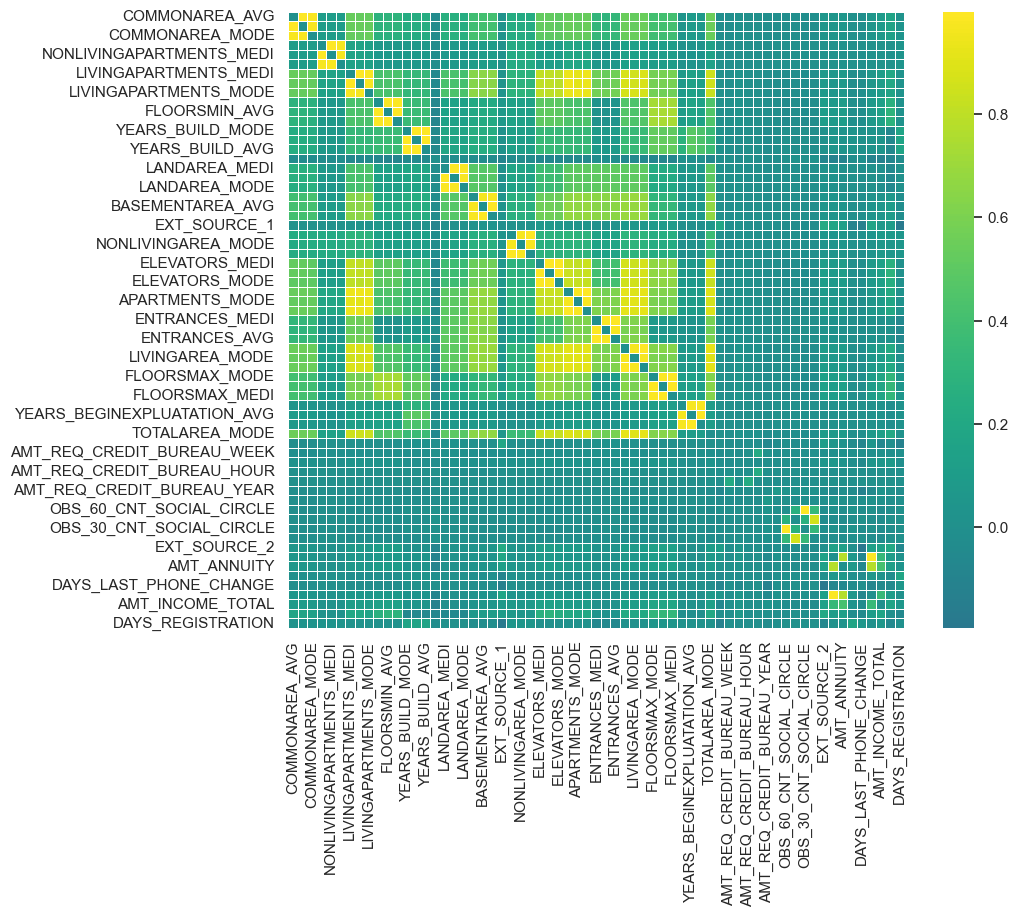

0

In [18]:
f_aux.get_corr_matrix(dataset = df_loan_train[list_var_continuous], 
                metodo='pearson', size_figure=[10,8])

De las correlaciones observadas me gustaría destacar dos de ellas:

1. Observamos como AMT_CREDIT y AMT_ANNUITY tienen una correlación positiva del 77%, es decir, si aumenta la cantidad de dinero prestado al cliente, aumenta la anualidad de la solicitud anterior.

2. AMT_CREDIT Y AMT_GOOD_PRICES presentan una correlación lineal positiva del 99%, es decir, cuanto mayor es cantidad prestada al cliente, mayor es el valor de sus bienes para los que se le ha concedido el préstamo. Esto es algo lógico.

Además de estas dos correlaciones, la variable 'TARGET' no está altamente correlacionada y no hay variables que expliquen el comportamiento de nuestra variable objetivo.

In [19]:
corr.loc['TARGET'].sort_values(ascending=False)

TARGET                          1.000000
DAYS_BIRTH                      0.079018
REGION_RATING_CLIENT_W_CITY     0.062261
REGION_RATING_CLIENT            0.060586
DAYS_LAST_PHONE_CHANGE          0.055939
DAYS_ID_PUBLISH                 0.052324
DAYS_REGISTRATION               0.042882
OWN_CAR_AGE                     0.036891
DEF_30_CNT_SOCIAL_CIRCLE        0.032783
DEF_60_CNT_SOCIAL_CIRCLE        0.032139
CNT_CHILDREN                    0.019645
AMT_REQ_CREDIT_BUREAU_YEAR      0.018901
CNT_FAM_MEMBERS                 0.009154
OBS_30_CNT_SOCIAL_CIRCLE        0.008565
OBS_60_CNT_SOCIAL_CIRCLE        0.008496
AMT_REQ_CREDIT_BUREAU_DAY       0.002428
AMT_REQ_CREDIT_BUREAU_HOUR      0.000375
NONLIVINGAPARTMENTS_MODE       -0.000173
NONLIVINGAPARTMENTS_MEDI       -0.001594
AMT_REQ_CREDIT_BUREAU_WEEK     -0.002012
NONLIVINGAPARTMENTS_AVG        -0.002018
AMT_REQ_CREDIT_BUREAU_QRT      -0.002602
SK_ID_CURR                     -0.002909
LANDAREA_MODE                  -0.008331
LANDAREA_AVG    

Ninguna variable explica de una manera muy grande a la variable Target, algo que parece normal en un problema tan complejo como es la detección de dificultad en pago de préstamos.


## Tratamiento de valores nulos

El tratamiento de valores nulos depende del contexto en el que estemos trabajando, la naturaleza de los datos y el impacto que los valores ausentes pueden tener en tu análisis o modelo de machine learning. En general hay varias opciones a la hora de imputar nuestros valores nulos:

1. Imputar los valores numéricos mediante la media si nuestras variables siguen una distribución normal o mediante la mediana cuando presenten valores atípicos. Imputar un valor fijo o predeterminado, o utilizar un algoritmo de imputación avanzada (KNN) que predice los valores ausentes en función de los valores de otras columnas.

2. Imputar los valores categóricos mediante la moda cuando las variables presentan valores dominantes, asignar un valor fijo como pudiera ser 'Desconocido'.

En mi caso, al no tener mucho contexto de las variables, decidiré imputar los valores nulos de las variables categóricas por un valor fijo 'Desconocido' ya que realmente no conocemos la naturaleza de esos valores nulos. Prefiero no imputar por moda, ya que en algunas variables categóricas realmente no observamos un valor predominante sobre los demás, por lo que podríamos distorsionar la distribución de dichas variables.

En el caso de las numéricas, optaré por imputar la mediana ya que la mayoría de las variables numéricas no siguen una distribución normal y a pesar de no presentar un gran porcentaje de valores atípicos la mediana no se ve afectada por valores extremos, a diferencia de la media. Además, los modelos de machine learning suelen ser sensibles a valores extremos. Usar la mediana reduce la posibilidad de que los valores imputados introduzcan ruido o sesgo no deseado.

En el caso de las variables booleanas, variables que toman el valor 0 o 1, si que optaré por imputar su moda, ya que no tiene sentido imputar por su mediana si verdaderamente su distribución toman dos únicos valores.

In [20]:
list_cat_vars, other = f_aux.dame_variables_categoricas(dataset=df_loan_train)

# Nos aseguramos de que las columnas categóricas permitan la categoría 'Desconocido'
for col in list_cat_vars:
    if pd.api.types.is_categorical_dtype(df_loan_train[col]):
        # Agregar 'Desconocido' como categoría si no existe
        df_loan_train[col] = df_loan_train[col].cat.add_categories(['Desconocido'])

# Imputar valores nulos con 'Desconocido'
df_loan_train[list_cat_vars] = df_loan_train[list_cat_vars].fillna(value='Desconocido')


df_loan_train[list_cat_vars]

C:\Users\RAMON\AppData\Local\Temp\ipykernel_5720\1574133440.py:5: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df_loan_train[col]):


FONDKAPREMONT_MODE WALLSMATERIAL_MODE    HOUSETYPE_MODE  \
259332        Desconocido       Stone, brick    block of flats   
24264         Desconocido        Desconocido       Desconocido   
254492      not specified              Panel    block of flats   
287605   reg oper account              Panel    block of flats   
78817         Desconocido       Stone, brick  specific housing   
...                   ...                ...               ...   
48338         Desconocido       Stone, brick    block of flats   
155639        Desconocido        Desconocido       Desconocido   
283469      not specified              Panel    block of flats   
201766        Desconocido        Desconocido       Desconocido   
121460        Desconocido              Panel    block of flats   

       EMERGENCYSTATE_MODE OCCUPATION_TYPE  NAME_TYPE_SUITE  \
259332                  No     Desconocido    Unaccompanied   
24264          Desconocido        Laborers    Unaccompanied   
254492                  No        HR staff    Unaccompanied   
287605                  No         Drivers  Spouse, partner   
78817                   No         Drivers    Unaccompanied   
...                    ...             ...              ...   
48338                   No     Desconocido    Unaccompanied   
155639         Desconocido         Drivers    Unaccompanied   
283469                  No     Accountants    Unaccompanied   
201766         Desconocido   Cooking staff           Family   
121460                  No      Core staff    Unaccompanied   

             ORGANIZATION_TYPE NAME_CONTRACT_TYPE FLAG_OWN_CAR CODE_GENDER  \
259332  Business Entity Type 3         Cash loans            N           F   
24264              Agriculture         Cash loans            N           M   
254492  Business Entity Type 3         Cash loans            N           F   
287605       Transport: type 3         Cash loans            Y           M   
78817        Transport: type 4         Cash loans            N           M   
...                        ...                ...          ...         ...   
48338                      XNA         Cash loans            N           F   
155639       Transport: type 3         Cash loans            Y           M   
283469               Emergency         Cash loans            N           F   
201766  Business Entity Type 3         Cash loans            Y           F   
121460                  School    Revolving loans            N           F   

            NAME_INCOME_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
259332  Commercial associate        Civil marriage  House / apartment   
24264                Working               Married  House / apartment   
254492  Commercial associate               Married  House / apartment   
287605  Commercial associate               Married  House / apartment   
78817                Working        Civil marriage  House / apartment   
...                      ...                   ...                ...   
48338              Pensioner               Married  House / apartment   
155639               Working               Married  House / apartment   
283469               Working  Single / not married  House / apartment   
201766               Working               Married  House / apartment   
121460               Working             Separated  House / apartment   

                  NAME_EDUCATION_TYPE FLAG_OWN_REALTY  \
259332  Secondary / secondary special               Y   
24264   Secondary / secondary special               Y   
254492  Secondary / secondary special               Y   
287605  Secondary / secondary special               Y   
78817   Secondary / secondary special               N   
...                               ...             ...   
48338   Secondary / secondary special               Y   
155639  Secondary / secondary special               Y   
283469               Higher education               Y   
201766  Secondary / secondary special               Y   
121460          

No observamos valores nulos en nuestras columnas que presentan valores booleanos, aunque si tuvieramos presencia de ellos y nos surgiera la necesidad de imputar la moda en lugar de esos valores, podríamos utilizar el bucle descrito en el siguiente código.

In [21]:
df_loan_train[df_loan_bool].isnull().sum()

# for col in df_loan_train.select_dtypes(include=['bool']).columns:
    # Calcular la moda de la columna
#    moda = df_loan_train[col].mode()[0]
    # Sustituir los valores nulos con la moda
#    df_loan_train[col] = df_loan_train[col].fillna(moda)

REG_REGION_NOT_LIVE_REGION     0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
TARGET                         0
LIVE_REGION_NOT_WORK_REGION    0
FLAG_EMAIL                     0
FLAG_PHONE                     0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
REG_REGION_NOT_WORK_REGION     0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_5                0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_11               0
FLAG_DOCUMENT_10               0
FLAG_DOCUMENT_9                0
FLAG_DOCUMENT_8                0
FLAG_DOCUMENT_7                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_12               0
FLAG_DOCUMENT_13               0
FLAG_DOCUMENT_19               0
FLAG_DOCUMENT_18               0
FLAG_DOCUMENT_17               0
FLAG_DOCUMENT_16               0
FLAG_DOCUMENT_15               0
FLAG_DOCUM

In [22]:
# Imputar valores nulos en columnas numéricas con la mediana
for col in df_loan_train.select_dtypes(include=['number']).columns:
    # Calcular la mediana de la columna
    mediana = df_loan_train[col].median()
    # Sustituir los valores nulos con la mediana
    df_loan_train[col] = df_loan_train[col].fillna(mediana)

df_loan_train[df_loan_num].head(10)

SK_ID_CURR  COMMONAREA_AVG  COMMONAREA_MEDI  COMMONAREA_MODE  \
259332      400125          0.0210           0.0208           0.0190   
24264       128225          0.0210           0.0208           0.0190   
254492      394490          0.0828           0.0833           0.0835   
287605      433150          0.0102           0.0102           0.0103   
78817       191369          0.0210           0.0208           0.0190   
81959       195041          0.0210           0.0208           0.0190   
28753       133409          0.0210           0.0208           0.0190   
18795       121918          0.0210           0.0208           0.0190   
303139      451207          0.0210           0.0208           0.0190   
286566      431902          0.0210           0.0208           0.0190   

        NONLIVINGAPARTMENTS_AVG  NONLIVINGAPARTMENTS_MEDI  \
259332                   0.0000                    0.0000   
24264                    0.0000                    0.0000   
254492                   0.0077                    0.0078   
287605                   0.0077                    0.0078   
78817                    0.0000                    0.0000   
81959                    0.0000                    0.0000   
28753                    0.0000                    0.0000   
18795                    0.0000                    0.0000   
303139                   0.0000                    0.0000   
286566                   0.0000                    0.0000   

        NONLIVINGAPARTMENTS_MODE  LIVINGAPARTMENTS_MEDI  LIVINGAPARTMENTS_AVG  \
259332                    0.0000                 0.0765                0.0756   
24264                     0.0000                 0.0765                0.0756   
254492                    0.0078                 0.1368                0.1345   
287605                    0.0078                 0.0624                0.0614   
78817                     0.0000                 0.0765                0.0756   
81959                     0.0000                 0.1231                0.1210   
28753                     0.0000                 0.0765                0.0756   
18795                     0.0000                 0.0765                0.0756   
303139                    0.0000                 0.0765                0.0756   
286566                    0.0000                 0.0765                0.0756   

        LIVINGAPARTMENTS_MODE  FLOORSMIN_AVG  YEARS_BUILD_MODE  \
259332                 0.0771         0.2083            0.7648   
24264                  0.0771         0.2083            0.7648   
254492                 0.1469         0.2083            0.6798   
287605                 0.0670         0.2083            0.6864   
78817                  0.0771         0.2083            0.7648   
81959                  0.1322         0.2083            0.7713   
28753                  0.0771         0.2083            0.7060   
18795                  0.0771         0.2083            0.7648   
303139                 0.0771         0.2083            0.7648   
286566                 0.0771         0.2083            0.7648   

        YEARS_BUILD_MEDI  YEARS_BUILD_AVG  OWN_CAR_AGE  LANDAREA_MEDI  \
259332            0.7585           0.7552          9.0         0.0488   
24264             0.7585           0.7552          9.0         0.0488   
254492            0.6713           0.6668          9.0         0.0000   
287605            0.6780           0.6736         12.0         0.0626   
78817             0.7585           0.7552          9.0         0.1121   
81959             0.7652           0.7620          9.0         0.1605   
28753             0.6981           0.6940          9.0         0.0262   
18795             0.7585           0.7552          9.0         0.0488   
303139            0.7585           0.7552          9.0         0.0488   
286566            0.7585           0.7552          3.0         0.0251   

        LANDAREA_AVG  LANDAREA_MODE  BASEMENTAREA_MODE  BASEMENTAREA_AVG  \
259332        0.0483         0.0460         

In [23]:
f_aux.get_percent_null_values_target(df_loan_train, [i for i in list_var_continuous], target='TARGET')

No existen variables con valores nulos


Empty DataFrame
Columns: []
Index: []

Nos aseguramos que todas las imputaciones de valores nulos se han realizado de manera exitosa.

#### Matriz de correlación para variables categóricas: Cramers V matrix

Debido a que no podemos ver la correlación de las variables categóricas con el estadístico de Pearson, vamos a acercarnos lo máximo posible con el estadístico de V Cramers. Podremos observar la correlación de nuestras variables categóricas.

Si bien aunque nuestras variables booleanas que toman valores de 0 o 1 son numéricas, su verdadero origen e interpretación es categórica, ya que si toma valor de 0 pertenece a una categoría distinta de si tomara valor de 1. Por tanto, trataremos a estas como tal y realizaremos su correlación según la V de Cramers.

In [24]:
df_cat_bool = pd.concat([df_loan_train[df_loan_cat], df_loan_train[df_loan_bool]], axis=1)
df_cat_bool.columns.values

array(['FONDKAPREMONT_MODE', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI',
       'ELEVATORS_MEDI', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'HOUSETYPE_MODE',
       'FLOORSMAX_MODE', 'EMERGENCYSTATE_MODE', 'OCCUPATION_TYPE',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'NAME_TYPE_SUITE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR',
       'CODE_GENDER', 'CNT_CHILDREN', 'NAME_INCOME_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_EDUCATION_TYPE',
       'FLAG_OWN_REALTY', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'FLAG_MOBIL', '

In [25]:
confusion_matrix = pd.crosstab(df_loan_train["TARGET"], df_loan_train["NAME_CONTRACT_TYPE"])
print(confusion_matrix)
f_aux.cramers_v(confusion_matrix.values)

NAME_CONTRACT_TYPE  Cash loans  Revolving loans
TARGET                                         
0                       204023            22125
1                        18596             1264


np.float64(0.03166322238115126)

In [26]:
confusion_matrix = pd.crosstab(df_loan_train["TARGET"], df_loan_train["TARGET"])
f_aux.cramers_v(confusion_matrix.values)

np.float64(0.9999726127135284)

In [27]:
corr_cats = f_aux.corr_cat(df=df_cat_bool, target='TARGET' ,target_transform=True)
corr_cats

FONDKAPREMONT_MODE  WALLSMATERIAL_MODE  \
FONDKAPREMONT_MODE                    1.000000            0.350704   
WALLSMATERIAL_MODE                    0.350704            1.000000   
HOUSETYPE_MODE                        0.395697            0.560048   
EMERGENCYSTATE_MODE                   0.461811            0.688290   
OCCUPATION_TYPE                       0.031193            0.032349   
NAME_TYPE_SUITE                       0.015339            0.012877   
NAME_CONTRACT_TYPE                    0.022614            0.027407   
FLAG_OWN_CAR                          0.016077            0.034357   
CODE_GENDER                           0.013197            0.021403   
NAME_INCOME_TYPE                      0.026844            0.029934   
NAME_FAMILY_STATUS                    0.024832            0.034434   
NAME_HOUSING_TYPE                     0.031356            0.044607   
NAME_EDUCATION_TYPE                   0.044681            0.063964   
FLAG_OWN_REALTY                       0.017738            0.027872   
WEEKDAY_APPR_PROCESS_START            0.005628            0.003727   
TARGET                                0.031204            0.045131   

                            HOUSETYPE_MODE  EMERGENCYSTATE_MODE  \
FONDKAPREMONT_MODE                0.395697             0.461811   
WALLSMATERIAL_MODE                0.560048             0.688290   
HOUSETYPE_MODE                    1.000000             0.669625   
EMERGENCYSTATE_MODE               0.669625             1.000000   
OCCUPATION_TYPE                   0.045916             0.057077   
NAME_TYPE_SUITE                   0.017353             0.022999   
NAME_CONTRACT_TYPE                0.026531             0.026610   
FLAG_OWN_CAR                      0.032823             0.034644   
CODE_GENDER                       0.021063             0.022853   
NAME_INCOME_TYPE                  0.041403             0.052187   
NAME_FAMILY_STATUS                0.044610             0.056235   
NAME_HOUSING_TYPE                 0.045684             0.061086   
NAME_EDUCATION_TYPE               0.068625             0.087543   
FLAG_OWN_REALTY                   0.023057             0.022371   
WEEKDAY_APPR_PROCESS_START        0.003612             0.005747   
TARGET                            0.040952             0.042503   

                            OCCUPATION_TYPE  NAME_TYPE_SUITE  \
FONDKAPREMONT_MODE                 0.031193         0.015339   
WALLSMATERIAL_MODE                 0.032349         0.012877   
HOUSETYPE_MODE                     0.045916         0.017353   
EMERGENCYSTATE_MODE                0.057077         0.022999   
OCCUPATION_TYPE                    1.000000         0.020965   
NAME_TYPE_SUITE                    0.020965         1.000000   
NAME_CONTRACT_TYPE                 0.061281         0.029197   
FLAG_OWN_CAR                       0.257190         0.043497   
CODE_GENDER                        0.359149         0.045665   
NAME_INCOME_TYPE                   0.288943         0.020374   
NAME_FAMILY_STATUS                 0.089983         0.063316   
NAME_HOUSING_TYPE                  0.043238         0.019021   
NAME_EDUCATION_TYPE                0.188456         0.025082   
FLAG_OWN_REALTY                    0.048243         0.074705   
WEEKDAY_APPR_PROCESS_START         0.018185         0.016601   
TARGET                             0.080005         0.010549   

                            NAME_CONTRACT_TYPE  FLAG_OWN_CAR  CODE_GENDER  \
FONDKAPREMONT_MODE                    0.022614      0.016077     0.013197   
WALLSMATERIAL_MODE                    0.027407      0.034357     0.021403   
HOUSETYPE_MODE                        0.026531      0.032823     0.021063   
EMERGENCYSTATE_MODE                   0.026610      0.034644     0.022853   
OCCUPATION_TYPE                       0.061281      0.257190     0.359149   
NAME_TYPE_SUITE                       0.029197      0.043497     0.045665   
NAME_CONTRACT_TYPE                    0.999976      0.002632     0.01

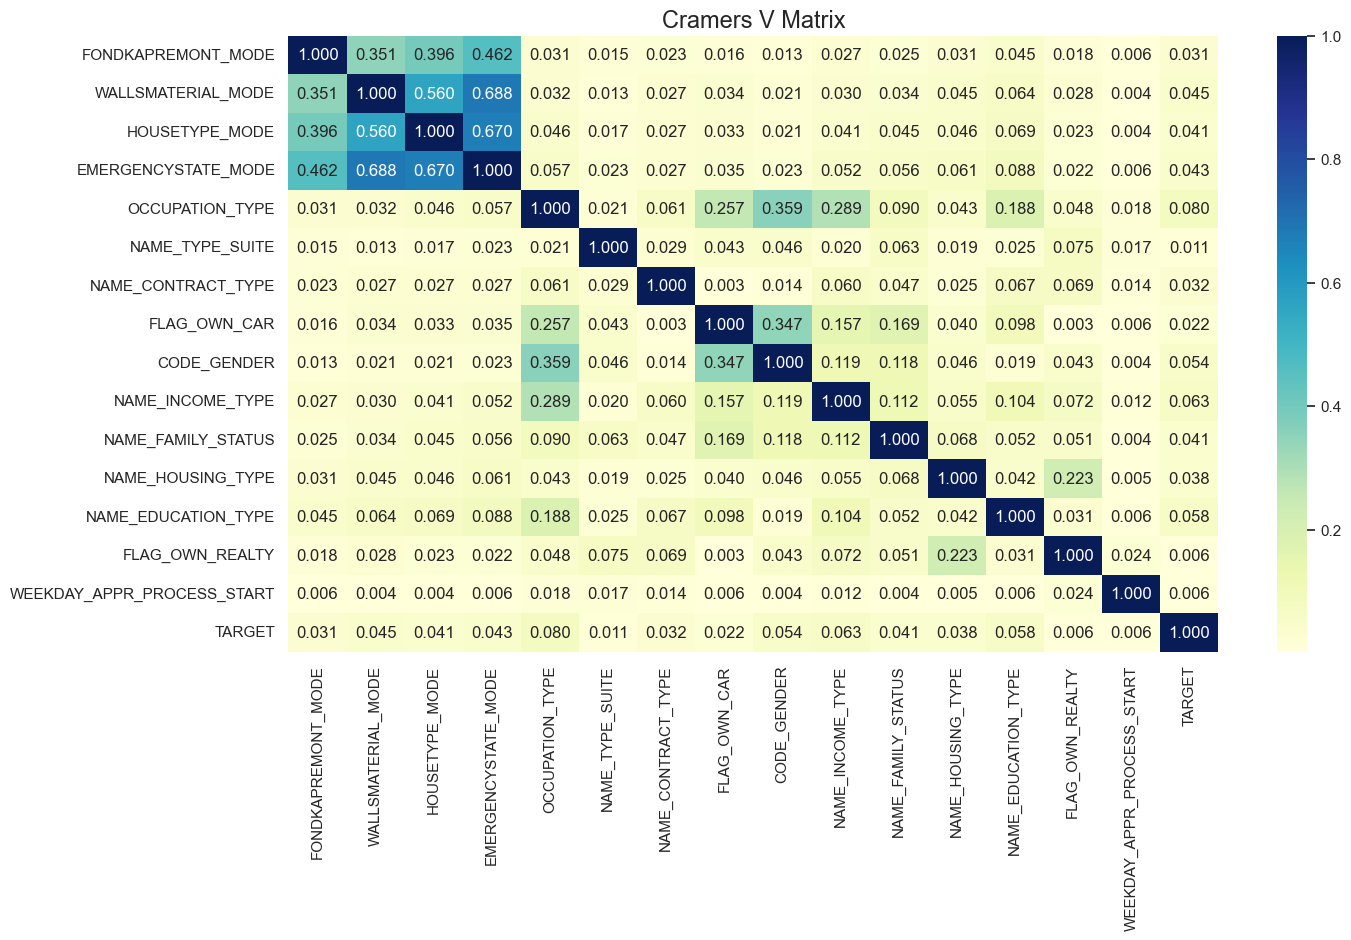

In [28]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_cats, annot=True, fmt='.3f', cmap='YlGnBu')
plt.title('Cramers V Matrix', fontdict={'size':'17'})
plt.show()

In [29]:
warnings.filterwarnings("ignore")

corr_bool = f_aux.corr_cat_boolean(df_loan_train[df_loan_bool])
corr_bool

REG_REGION_NOT_LIVE_REGION  FLAG_MOBIL  \
REG_REGION_NOT_LIVE_REGION                     0.999864           0   
FLAG_MOBIL                                     0.000000           0   
FLAG_EMP_PHONE                                 0.036992           0   
FLAG_WORK_PHONE                                0.063914           0   
FLAG_CONT_MOBILE                               0.000000           0   
TARGET                                         0.004242           0   
LIVE_REGION_NOT_WORK_REGION                    0.089836           0   
FLAG_EMAIL                                     0.017164           0   
FLAG_PHONE                                     0.000000           0   
REG_CITY_NOT_LIVE_CITY                         0.338174           0   
REG_CITY_NOT_WORK_CITY                         0.141571           0   
LIVE_CITY_NOT_WORK_CITY                        0.010449           0   
REG_REGION_NOT_WORK_REGION                     0.450761           0   
FLAG_DOCUMENT_4                                0.000000           0   
FLAG_DOCUMENT_5                                0.007490           0   
FLAG_DOCUMENT_2                                0.000000           0   
FLAG_DOCUMENT_3                                0.034252           0   
FLAG_DOCUMENT_11                               0.101680           0   
FLAG_DOCUMENT_10                               0.001879           0   
FLAG_DOCUMENT_9                                0.017811           0   
FLAG_DOCUMENT_8                                0.024760           0   
FLAG_DOCUMENT_7                                0.000480           0   
FLAG_DOCUMENT_6                                0.023944           0   
FLAG_DOCUMENT_12                               0.000000           0   
FLAG_DOCUMENT_13                               0.002715           0   
FLAG_DOCUMENT_19                               0.000000           0   
FLAG_DOCUMENT_18                               0.007240           0   
FLAG_DOCUMENT_17                               0.004814           0   
FLAG_DOCUMENT_16                               0.005252           0   
FLAG_DOCUMENT_15                               0.000000           0   
FLAG_DOCUMENT_14                               0.002074           0   
FLAG_DOCUMENT_20                               0.000000           0   
FLAG_DOCUMENT_21                               0.005131           0   

                             FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
REG_REGION_NOT_LIVE_REGION         0.036992         0.063914   
FLAG_MOBIL                         0.000000         0.000000   
FLAG_EMP_PHONE                     0.999986         0.233911   
FLAG_WORK_PHONE                    0.233911         0.999987   
FLAG_CONT_MOBILE                   0.012748         0.021282   
TARGET                             0.045857         0.027950   
LIVE_REGION_NOT_WORK_REGION        0.096295         0.040336   
FLAG_EMAIL                         0.062467         0.010576   
FLAG_PHONE                         0.015658         0.292837   
REG_CITY_NOT_LIVE_CITY             0.092283         0.046289   
REG_CITY_NOT_WORK_CITY             0.256430         0.122051   
LIVE_CITY_NOT_WORK_CITY            0.219344         0.110347   
REG_REGION_NOT_WORK_REGION         0.108161         0.066818   
FLAG_DOCUMENT_4                    0.000000         0.003384   
FLAG_DOCUMENT_5                    0.019708         0.037505   
FLAG_DOCUMENT_2                    0.001504         0.000000   
FLAG_DOCUMENT_3                    0.248240         0.059854   
FLAG_DOCUMENT_11                   0.029358         0.123921   
FLAG_DOCUMENT_10                   0.000000         0.001769   
FLAG_DOCUMENT_9                    0.023420         0.008806   
FLAG_DOCUMENT_8                    0.122301         0.021329   
FLAG_DOCUMENT_7                    0.000000         0.000000   
FLAG_DOCUMENT_6                    0.597116         0.138268   
FLAG_DOCUMENT_12                   0.000000         0.000000   
FLAG_DOCUMENT_

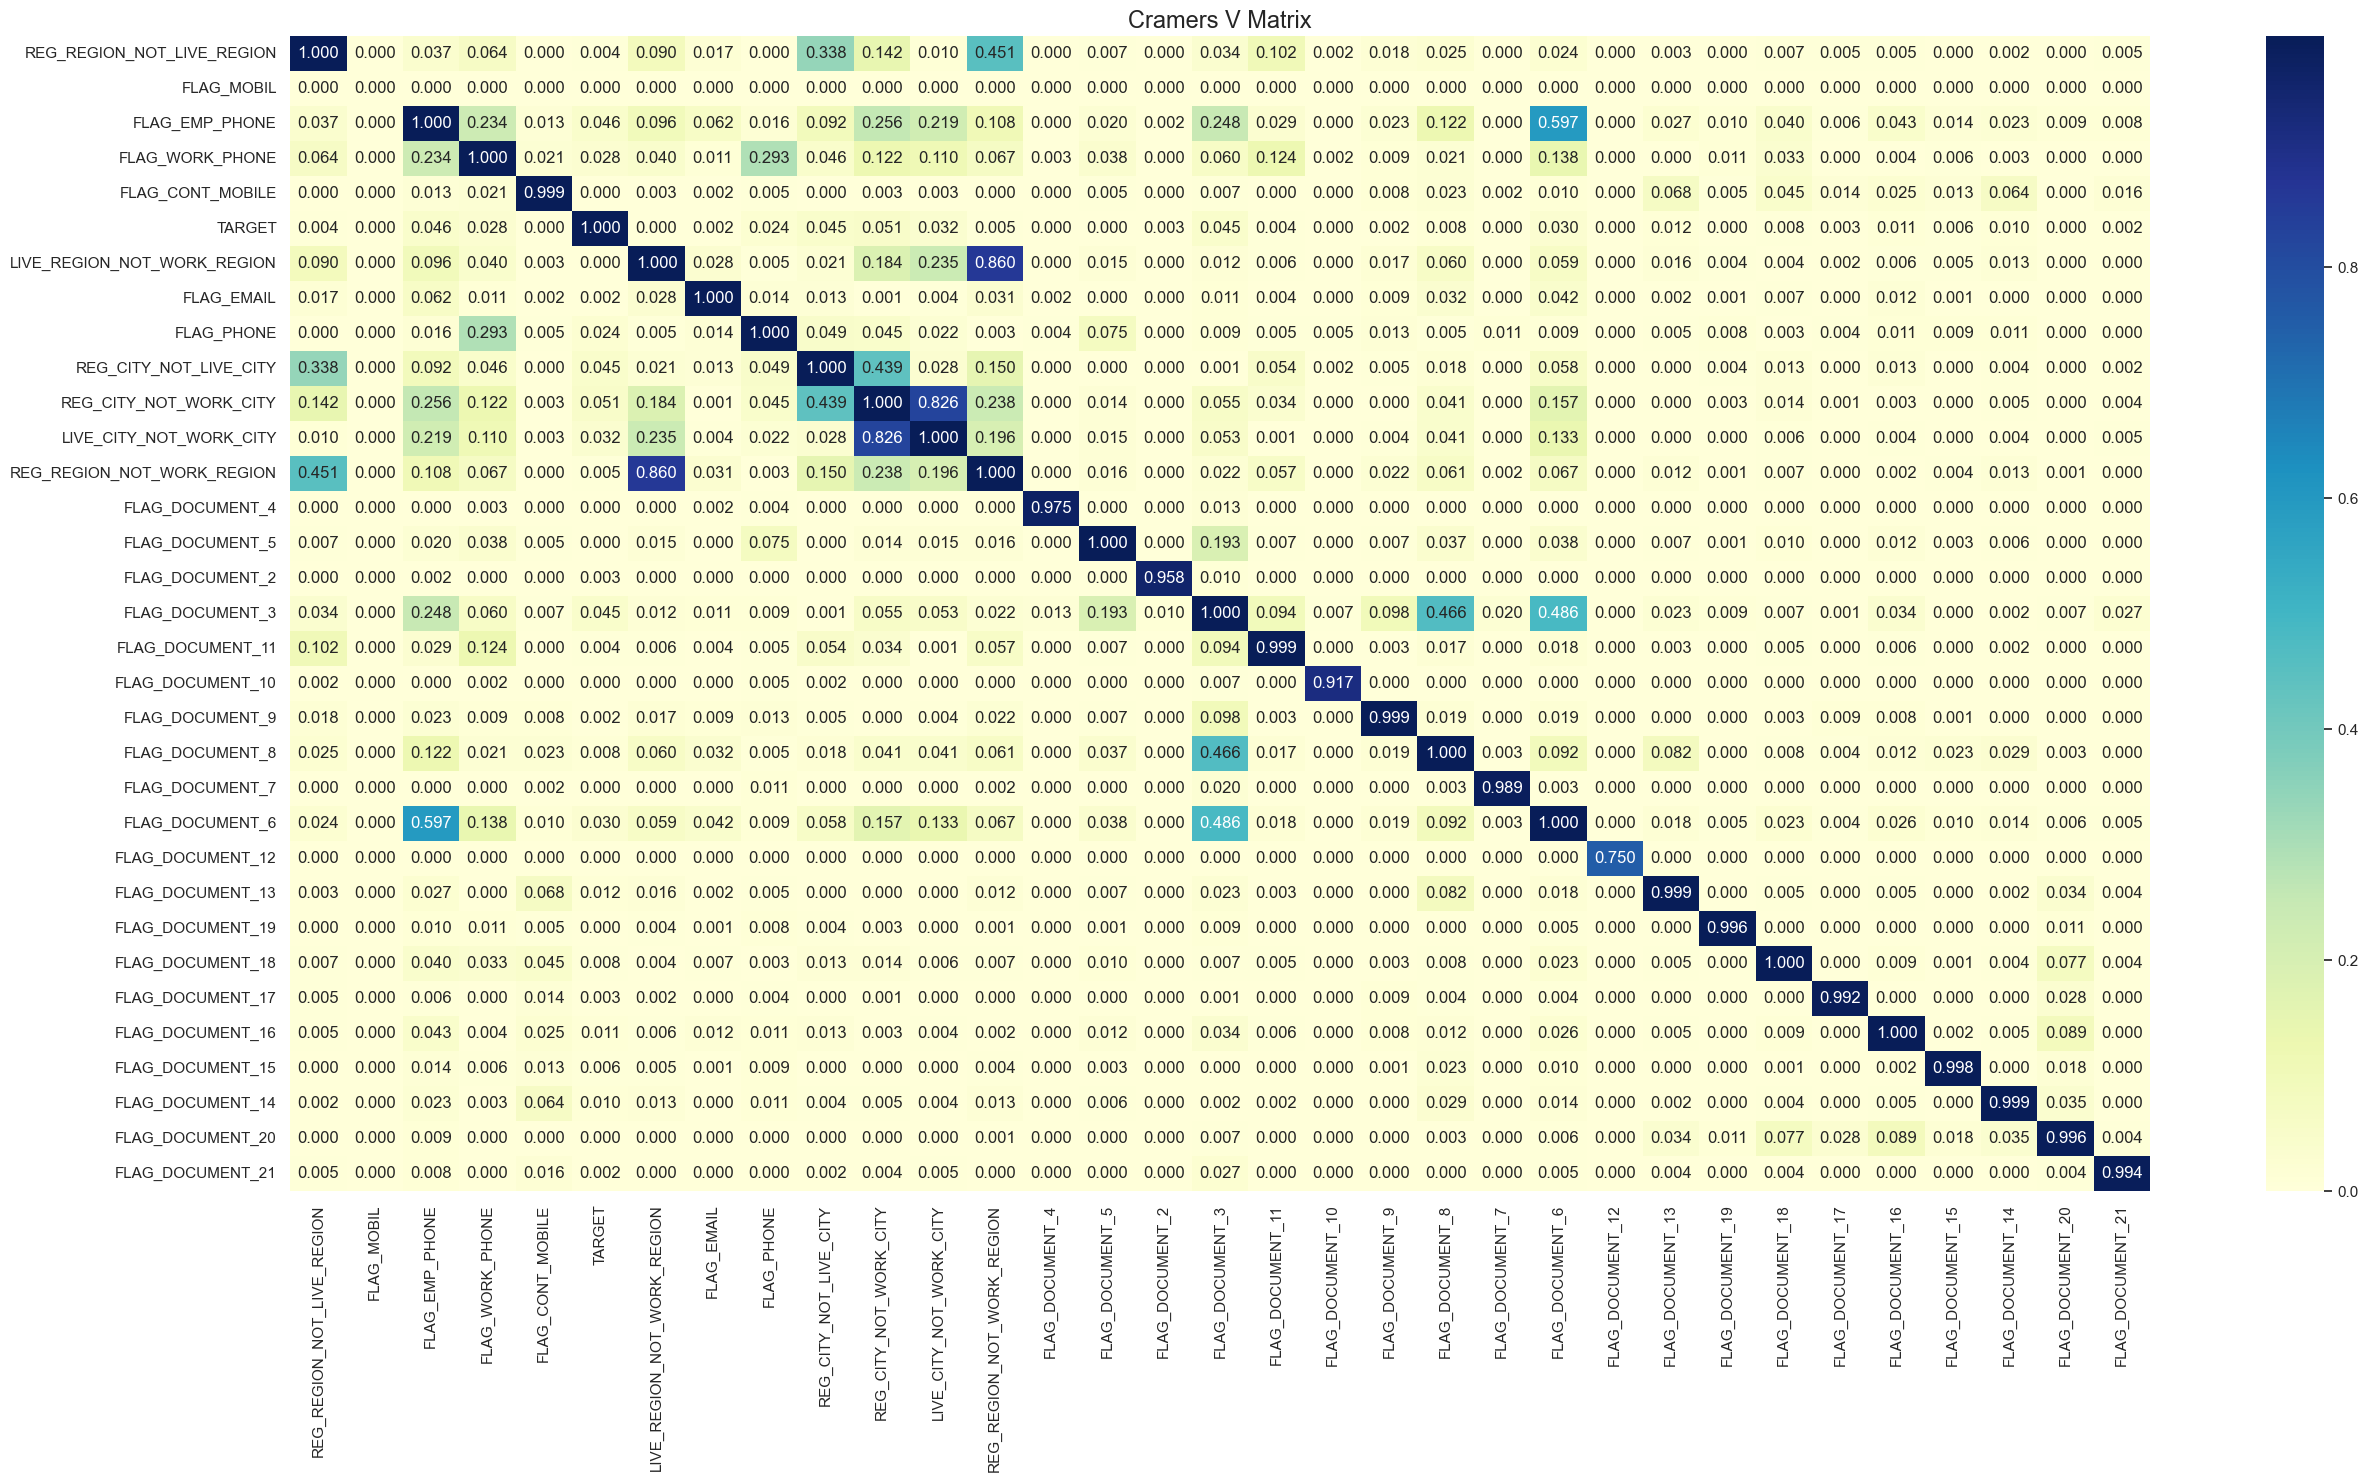

In [30]:
plt.figure(figsize=(30,15))
sns.heatmap(corr_bool, annot=True, fmt='.3f', cmap='YlGnBu')
plt.title('Cramers V Matrix', fontdict={'size':'17'})
plt.show()

Si bien no se observan correlaciones muy altas de las diferentes variables categóricas y booleanas con nuestra variable target, la variable que tiene la correlación más alta es OCUPATION_TYPE, que comentamos anteriormente en en análisis gráfico. Esta variable presenta una correlación del 8%, aunque no es mucho si que podría tener importancia en el modelo.

Destacar correlaciones entre el 30% y el 70% entre variables como pueden ser el tipo de vivienda y sus materiales de construcción, además de las características de las viviendas. Esta alta relación no es preocupante ya que se trata de una relación lógica.

También observar una correlación del 42.3% entre el nombre del puesto de trabajo que ocupa el cliente y el tipo de empresa en la que trabaja. A priori también una relación normal y no preocupante.

## Exportación de datasets

In [31]:
print(df_loan_train.shape, df_loan_test.shape)

(246008, 122) (61503, 122)


In [36]:
df_loan_train.to_csv('../../data_loan_status/data_split/df_loan_train.csv', index=False) 
df_loan_test.to_csv('../../data_loan_status/data_split/df_loan_test.csv', index=False)

## Conclusiones EDA

Como hipótesis inicial y respondiendo a la pregunta planteada para la práctica ¿Hay algún tipo de clientes más propenso a no devolver un préstamo? Según nuestro análisis exploratorio de los datos podríamos deducir que tipo de cliente sería más propenso a no devolver un préstamo. Destacar que este perfilado de clientes es una hipótesis propia realizada bajo mi criterio según los valores estadísticos visualizados en el EDA, que podremos contrastar cuando realicemos el Feature engineering y el modelado. En esa parte de la práctica volveremos a comentar si rechazamos o no rechazamos la hipótesis nula aqui planteada.

Según el análisis exploratorio de los datos realizados en los 2 primeros notebooks, podemos intuir que el tipo de cliente que tendrá dificultades a la hora de pagar o devolver el préstamo de manera completa será:
- Un cliente con una baja educación
- Que tenga un coche antiguo
- Un trabajo cualificadamente bajo
- Que tenga una vivienda construida con materiales pobres, especialmente madera.
- Una familia grande con mas de 2 hijos
- Que esté desempleado o de baja

Posteriormente en la realización del feature engineering y del modelado verificaremos si la hipótesis inicial planteada según mi criterio bajo la interpretación de los estadísticos realizados y visualizados se cumple.

En la realización de este análisis exploratorio de los datos hemos aprendido:

1. Entendimiento profundo de nuestros datos y de la problemática de negocio.
2. La importación de nuestros datos, dimensiones de los mismos, división y reconocimiento de las diferentes categorías aportando una visualización de las mismas.
3. Detección, graficado y análisis de nuestra variable objetivo. Concluyendo que presentaba un claro desbalanceo.
4. Separación de nuestro dataset en train y test de manera estratificada debido al desbalanceo de nuestra variable objetivo.
5. Visualización descriptiva de nuestras variables, pudiendo comprender su naturaleza, distribución e importancia en la variable objetivo.
6. Tratamiento de valores atípicos (outliers), comprendiendo la importancia de los mismos y la repercusión que pudieran tener en la fase de modelado.
7. Tratamiento de valores nulos, en todas las categorías de los datos (numéricos, booleanos y categóricos), aprendiendo y reflexionando sobre las diferentes métricas de imputación de valores nulos. Observando como afectan a la distribución y a la descripción estadística de nuestras variables.
8. Análisis de correlación de las variables, pudiendo comprender como afecta una alta correlación en nuestra variable objetivo.

Todo esto nos permitió comprender que trabajamos con un Dataset que contiene muchas variables de diferentes tipos, con las cuales buscamos explicar y predecir el comportamiento de nuestra variable objetivo, es decir, cuando un cliente puede llegar a tener dificultades en el pago de un préstamo.

Con estas conclusiones, tenemos un problema complejo por delante que supondrá un gran reto desde el punto de vista del éxito de nuestros modelos, debido a que el modelo más simple de todos sería decir que pocos clientes tendrían dificultades en el pago del préstamo, ya que sólo tendríamos error en el 8.07% de las veces. El objetivo será intentar mejorar ese porcentaje agregando complejidad a nuestro análisis.

#### Cosas a tener en cuenta a la hora de ejecutar modelos:

- Podría ser necesario balancear el modelo, con técnicas de oversampling
- Hay variables que identificamos como importantes para predecir la dificultad de pago, como OCCUPATION_TYPE (puesto de trabajo), NAME_EDUCATION_TYPE (tipo de educación), NAME_INCOME_TYPE (pensionista, estudiante, trabajador), CNT_CHILDREN (tamaño de la familia), entre otras.
- Posibilidad de realizar un Mean Encoding en vez de One-Hot encoding para variables categóricas que presenten muchas categorías.